In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
from VersaQT.data_manip import *
from personal_projects.symbolic_reconstruct import *

from pysr import PySRRegressor
import sympy as smp

plt.rcParams["figure.figsize"] = (10, 6)  # Width=10, Height=6 (in inches)

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [2]:
corn = yf.download("ZC=F", start="2020-01-01", end="2023-12-31", interval="1d")
corn.columns = corn.columns.get_level_values(0)
corn

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,391.50,392.00,387.25,387.75,103987
2020-01-03,386.50,392.00,385.50,391.50,125931
2020-01-06,384.75,387.75,382.75,386.25,112130
2020-01-07,384.50,385.75,383.50,385.00,93541
2020-01-08,384.25,385.50,382.25,384.00,135523
...,...,...,...,...,...
2023-12-22,473.00,474.00,471.50,472.50,80484
2023-12-26,480.25,481.00,471.50,473.00,114198
2023-12-27,476.50,480.25,474.50,479.75,107950


In [3]:
corn.reset_index(inplace=True)
corn

Price,Date,Close,High,Low,Open,Volume
0,2020-01-02,391.50,392.00,387.25,387.75,103987
1,2020-01-03,386.50,392.00,385.50,391.50,125931
2,2020-01-06,384.75,387.75,382.75,386.25,112130
3,2020-01-07,384.50,385.75,383.50,385.00,93541
4,2020-01-08,384.25,385.50,382.25,384.00,135523
...,...,...,...,...,...,...
1001,2023-12-22,473.00,474.00,471.50,472.50,80484
1002,2023-12-26,480.25,481.00,471.50,473.00,114198
1003,2023-12-27,476.50,480.25,474.50,479.75,107950
1004,2023-12-28,474.25,478.75,474.00,476.00,99398


In [4]:
X = np.c_[corn.index.values]
y = np.c_[corn.Close.values]

ReconstructAnalysis = ReconstructAnalyse()
ReconstructAnalysis.createSolutions("cluster_output", "new_tests")
reconstruct_df = ReconstructAnalysis.createSum(X, y)
reconstruct_df

,Iter,Range,SumExpr,y_pred,y_test
0,0,0.8,<function _lambdifygenerated at 0x0000020A7F3A...,"[663.7812521297585, 663.9162765058062, 664.055...","[627.5, 626.5, 632.75, 634.25, 633.0, 630.0, 6..."
1,1,0.8,<function _lambdifygenerated at 0x0000020A2A00...,"[671.7463331463667, 672.0662364967524, 672.389...","[627.5, 626.5, 632.75, 634.25, 633.0, 630.0, 6..."
2,2,0.8,<function _lambdifygenerated at 0x0000020A7F3A...,"[655.5901803020711, 655.7298447056481, 655.874...","[627.5, 626.5, 632.75, 634.25, 633.0, 630.0, 6..."
3,3,0.8,<function _lambdifygenerated at 0x0000020A7F3A...,"[656.052477382095, 656.0522021059189, 656.0654...","[627.5, 626.5, 632.75, 634.25, 633.0, 630.0, 6..."
4,4,0.8,<function _lambdifygenerated at 0x0000020A7F3A...,"[656.1654056590467, 655.6321062002004, 655.101...","[627.5, 626.5, 632.75, 634.25, 633.0, 630.0, 6..."
5,5,0.8,<function _lambdifygenerated at 0x0000020A7F3A...,"[646.827199548493, 646.8814470815406, 646.9399...","[627.5, 626.5, 632.75, 634.25, 633.0, 630.0, 6..."
6,6,0.8,<function _lambdifygenerated at 0x0000020A7F3A...,"[659.0256671863477, 659.181023770426, 659.3411...","[627.5, 626.5, 632.75, 634.25, 633.0, 630.0, 6..."
7,7,0.8,<function _lambdifygenerated at 0x0000020A7F3A...,"[657.006929208179, 656.9210500963981, 656.8331...","[627.5, 626.5, 632.75, 634.25, 633.0, 630.0, 6..."
8,8,0.8,<function _lambdifygenerated at 0x0000020A7F3A...,"[643.409836751251, 643.5530429159705, 643.7023...","[627.5, 626.5, 632.75, 634.25, 633.0, 630.0, 6..."
9,9,0.8,<function _lambdifygenerated at 0x0000020A7CCF...,"[682.5501254016829, 683.5718252186498, 684.609...","[627.5, 626.5, 632.75, 634.25, 633.0, 630.0, 6..."


In [5]:
similarity_df = ReconstructAnalysis.similarity_analisis(n_points=5)
similarity_df

,Iter,Range,CosineSimilarity,AngleReal,AnglePred,Agreement,PredDirection
0,0,0.8,0.999989,0.193592,0.139890,1.0,1.0
1,1,0.8,0.999990,0.193592,0.314084,1.0,1.0
2,2,0.8,0.999989,0.193592,0.145851,1.0,1.0
3,3,0.8,0.999988,0.193592,0.020543,1.0,1.0
4,4,0.8,0.999982,0.193592,-0.485237,-1.0,-1.0
5,5,0.8,0.999988,0.193592,0.060548,1.0,1.0
6,6,0.8,0.999989,0.193592,0.161023,1.0,1.0
7,7,0.8,0.999987,0.193592,-0.088946,-1.0,-1.0
8,8,0.8,0.999989,0.193592,0.151158,1.0,1.0
9,9,0.8,0.999994,0.193592,0.807542,1.0,1.0


In [11]:
ReconstructAnalysis.conclusion_analysis(n_points=5)

,Direction,Probility,CosineSimilarityMean
Range,,,
0.8,1.0,0.8,0.999988
0.9,-1.0,0.8,0.999839
0.95,-1.0,0.8,0.999919


In [7]:
def time_train_test_split(X, y, train_size=0.8):
    X_ = X.reshape(-1, )
    y_ = y.reshape(-1, )

    size = X_.size
    div_id = int(X_.size*train_size)

    X_train, X_test = X_[:div_id], X_[div_id:]
    y_train, y_test = y_[:div_id], y_[div_id:]

    return X_train, y_train, X_test, y_test

In [ ]:
X = np.c_[corn.index.values]
y = np.c_[corn.Close.values]

X_train, y_train, X_test, y_test = time_train_test_split(X, y)

<Axes: ylabel='Close'>

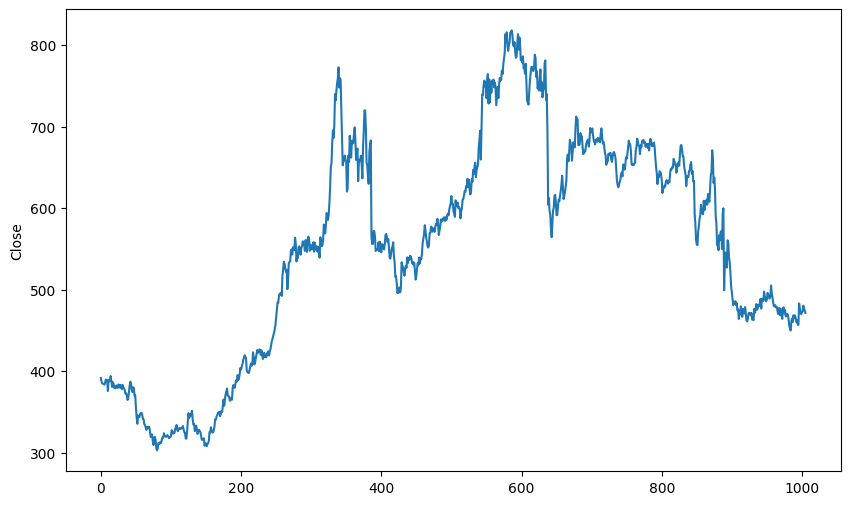

In [6]:
sns.lineplot(corn, y="Close", x=corn.index.values)

# Symbolic Reconstruct

In [7]:
pysr = PySRRegressor(
    binary_operators=["+", "-", "*", "/"], 
    unary_operators=["exp", "cos", "sin", "tan"],
    temp_equation_file=True,
    elementwise_loss="loss(prediction, target) = (prediction - target)^2",
    niterations=60,
    populations=20,
    population_size=60,
    maxsize=40,
    warm_start=False,
    verbosity=False,
    progress=False
)

In [8]:
SRRecontruct = SymbolicReconstruct(pysr)
SRRecontruct.fit(np.c_[X_train], np.c_[y_train])

In [9]:
SRRecontruct.decomposition.shape

(7, 804)

In [10]:
decomp_size = SRRecontruct.decomposition.shape[0]-1
SRRecontruct.set_use_indexes(list(range(decomp_size, decomp_size-3, -1)))
SRRecontruct.y_decompose

array([[ 3.92694767e+02,  3.92872842e+02,  3.93053094e+02, ...,
         6.97761196e+02,  6.97604663e+02,  6.97445845e+02],
       [-9.13025451e+01, -9.13025155e+01, -9.12905099e+01, ...,
        -3.40042921e+01, -3.35985100e+01, -3.31876498e+01],
       [ 8.44965348e+01,  8.44419523e+01,  8.43479464e+01, ...,
        -4.34232905e-01, -5.17650414e-01, -6.06545891e-01]])

In [11]:
os.listdir("cluster_output")[1]

file_name = "new_tests"
if (os.listdir("cluster_output")[1][0:len(file_name)] == file_name):
    print("oi")

oi


In [12]:
def createSolutions(dir, file_name):
    files = os.listdir(dir)
    size = len(file_name)

    ranges = []
    indexes = []
    solutions_df = []

    for file in files:
        if (file[0:size] == file_name):
            range_ = re.findall(r"-[\d\.]*-", file)[0][1:-1]
            index = re.findall(r"-\d*\.pkl", file)[0][1:-4]

            ranges.append(range_)
            indexes.append(index)

            with open(os.path.join(dir, file), "rb") as file_:
                solution_ = pickle.load(file_)

                solu_df = pd.DataFrame(solution_)
            
            solu_df["Range"] = range_
            solu_df["Iter"] = index

            solutions_df.append(solu_df)

    return pd.concat(solutions_df)
            
def create_sum(solutions_df, sympy_var=[smp.symbols("x0")]):
    solutions_all = []
    for range_ in solutions_df["Range"].unique():
        sols_ = solutions_df[solutions_df["Range"] == range_]

        solutions = []
        for iter_ in sols_["Iter"].unique():
            sols__ = sols_[sols_["Iter"] == iter_]
            sum_expr = smp.lambdify(sympy_var, np.sum(sols__["Expr"].values))
            
            solutions_dict = {
                "Iter": iter_,
                "Range": range_,
                "SumExpr": sum_expr
            }
            solutions.append(solutions_dict)

        solutions_all.append(pd.DataFrame(solutions))

    solutions_df = pd.concat(solutions_all).reset_index(drop=True)
    return solutions_df

In [13]:
createSolutions("cluster_output", "new_tests")
create_sum(createSolutions("cluster_output", "new_tests"))

,Iter,Range,SumExpr
0,0,0.8,<function _lambdifygenerated at 0x000002091165...
1,1,0.8,<function _lambdifygenerated at 0x000002091165...
2,2,0.8,<function _lambdifygenerated at 0x000002090FA7...
3,3,0.8,<function _lambdifygenerated at 0x000002091165...
4,4,0.8,<function _lambdifygenerated at 0x000002091165...
5,5,0.8,<function _lambdifygenerated at 0x000002091165...
6,6,0.8,<function _lambdifygenerated at 0x000002091165...
7,7,0.8,<function _lambdifygenerated at 0x000002091165...
8,8,0.8,<function _lambdifygenerated at 0x000002091165...
9,9,0.8,<function _lambdifygenerated at 0x000002091165...


In [14]:
multi_dfs = []

for j in [0.8, 0.9, 0.95]:
    solutions = []
    for i in range(10):
        with open(f"cluster_output/new_tests-{j}-{i}.pkl", "rb") as file:
            test = pickle.load(file)
            solutions.append(test)

    dfs = []
    for c in range(len(solutions)):
        df_ = pd.DataFrame(solutions[c])
        df_["Iter"] = c
        dfs.append(df_)

    multi_solutions = pd.concat(dfs)
    multi_solutions["Range"] = j
    multi_dfs.append(multi_solutions)

all_sols = pd.concat(multi_dfs).reset_index(drop=True)

In [15]:
all_sols

,Expr,MSE,EMF,Iter,Range
0,0.03517939*x0 + (0.0009621916 - 7.227759932855...,16326.213043,6,0,0.80
1,-125.832706036539*sin(0.0013356467548389*x0 + ...,11407.627581,5,0,0.80
2,exp(exp(tan(sin(0.15463509 + exp(-sin(0.010165...,5727.849545,4,0,0.80
3,0.38600326*x0 + 10.7892614480807*cos(0.0104302...,16475.169003,6,1,0.80
4,-53.694388721601*sin(0.01030096*x0 + 0.5506227...,11336.344382,5,1,0.80
...,...,...,...,...,...
85,44.0251300469314*cos(0.014891263*x0 - 1.0*sin(...,1687.743143,5,8,0.95
86,61.7424357489691*cos(0.018397382*x0 - sin(0.02...,4863.154773,4,8,0.95
87,0.103406814969038*x0 + exp(2.94008590408426*ex...,36371.514492,6,9,0.95
88,38.448172819414*cos(0.01520187*x0 - 1.0*cos(0....,1536.305314,5,9,0.95


In [16]:
X = np.c_[corn.index.values]
y = np.c_[corn.Close.values]

X_train, y_train, X_test, y_test = time_train_test_split(X, y, train_size=0.8)

In [17]:
x = smp.symbols("x0")


solutions_all = []
for range_ in all_sols["Range"].unique():
    sols_ = all_sols[all_sols["Range"] == range_]

    solutions = []
    for iter_ in sols_["Iter"].unique():
        sols__ = sols_[sols_["Iter"] == iter_]
        sum_expr = smp.lambdify([x], np.sum(sols__["Expr"].values))
        
        solutions_dict = {
            "Iter": iter_,
            "Range": range_,
            "SumExpr": sum_expr
        }
        solutions.append(solutions_dict)

    solutions_all.append(pd.DataFrame(solutions))

solutions_df = pd.concat(solutions_all)

In [18]:
solutions_df

,Iter,Range,SumExpr
0,0,0.80,<function _lambdifygenerated at 0x000002091165...
1,1,0.80,<function _lambdifygenerated at 0x000002091165...
2,2,0.80,<function _lambdifygenerated at 0x000002091165...
3,3,0.80,<function _lambdifygenerated at 0x000002091AB5...
4,4,0.80,<function _lambdifygenerated at 0x000002090FA7...
5,5,0.80,<function _lambdifygenerated at 0x000002091165...
6,6,0.80,<function _lambdifygenerated at 0x000002091165...
7,7,0.80,<function _lambdifygenerated at 0x000002090FAF...
8,8,0.80,<function _lambdifygenerated at 0x000002091AB5...
9,9,0.80,<function _lambdifygenerated at 0x000002091AB5...


In [21]:
ReconstructAnalysis = ReconstructAnalyse()
# ReconstructAnalysis.createSolutions("cluster_output", "new_tests")
ReconstructAnalysis.createSum(dir="cluster_output", file_name="new_tests")

AttributeError: 'NoneType' object has no attribute 'copy'

In [ ]:
corn
corn_series = pd.Series(corn.Close.values, index=corn.Date.values)

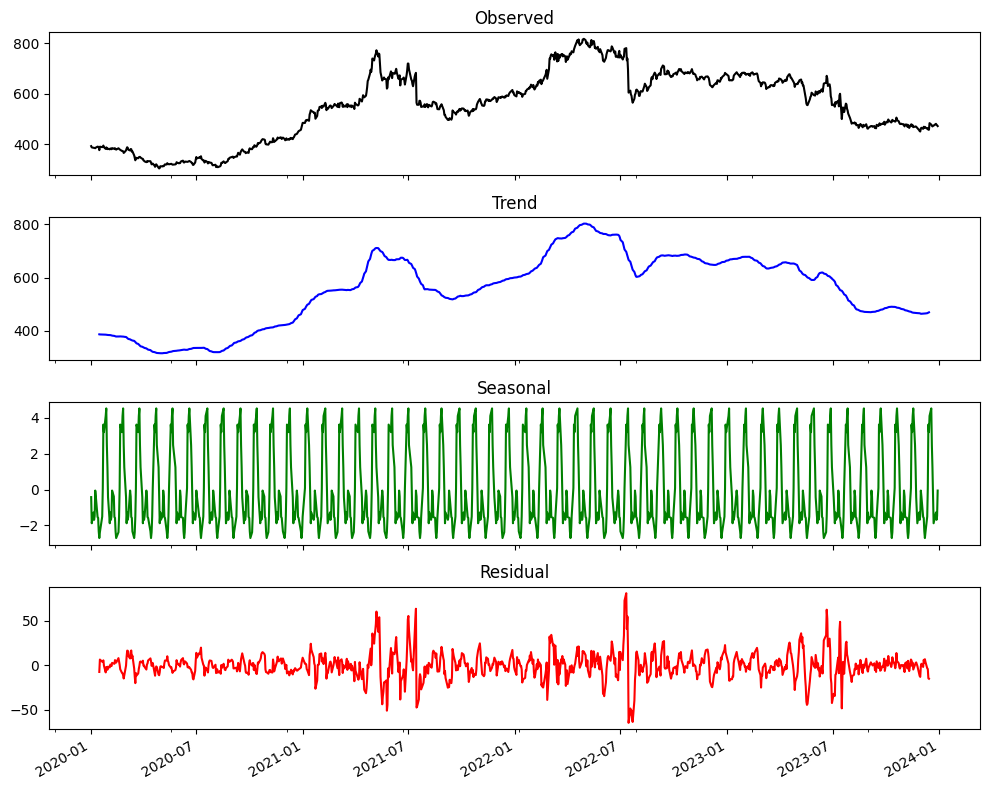

In [ ]:
from statsmodels.tsa.seasonal import STL, seasonal_decompose

# Decompose the time series
result = seasonal_decompose(corn_series, model="additive", period=20)  # Choose an appropriate period

# Plot decomposition
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
result.observed.plot(ax=axes[0], title="Observed", color="black")
result.trend.plot(ax=axes[1], title="Trend", color="blue")
result.seasonal.plot(ax=axes[2], title="Seasonal", color="green")
result.resid.plot(ax=axes[3], title="Residual", color="red")
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

def cosine_similarity(actual: np.ndarray, predicted: np.ndarray) -> float:
    """
    Compute the cosine similarity between actual and predicted vectors.
    
    Parameters:
    actual (np.ndarray): The actual values.
    predicted (np.ndarray): The predicted values.

    Returns:
    float: Cosine similarity between the two vectors.
    """
    # Ensure inputs are numpy arrays
    actual = np.array(actual)
    predicted = np.array(predicted)
    
    # Compute cosine similarity
    dot_product = np.dot(actual, predicted)
    norm_actual = np.linalg.norm(actual)
    norm_predicted = np.linalg.norm(predicted)
    
    # Avoid division by zero
    if norm_actual == 0 or norm_predicted == 0:
        return 0.0  # If either vector is zero, similarity is undefined (return 0)
    
    return dot_product / (norm_actual * norm_predicted)


def zero_centered_angle_similarity(actual: np.ndarray, predicted: np.ndarray, derivative=False) -> float:
    """
    Compute the similarity based on zero-centered angles.
    Translates both vectors to zero and measures the angle difference.
    
    Parameters:
    actual (np.ndarray): The actual values.
    predicted (np.ndarray): The predicted values.

    Returns:
    float: Mean absolute angle difference (lower is better).
    """
    # Ensure inputs are numpy arrays
    actual = np.array(actual)
    predicted = np.array(predicted)
    
    # Translate both vectors to zero by subtracting their means
    actual_zero_centered = actual - actual[0]
    predicted_zero_centered = predicted - predicted[0]
    
    # Compute angles relative to the zero line
    if derivative:
        angle_actual = np.arctan2(np.gradient(actual_zero_centered), 1)
        angle_predicted = np.arctan2(np.gradient(predicted_zero_centered), 1)
    else:
        angle_actual = np.arctan2(actual_zero_centered, 1)
        angle_predicted = np.arctan2(predicted_zero_centered, 1)
    
    direction = (np.mean(angle_actual) *np.mean(angle_predicted))/np.abs(np.mean(angle_actual) *np.mean(angle_predicted))
    return angle_actual, angle_predicted, direction

    # Compute mean absolute difference between angles
    # angle_diff = np.abs(angle_actual - angle_predicted)
    
    # return np.mean(angle_diff)  # Lower values indicate better similarity


In [ ]:
X_train, y_train, X_test, y_test = time_train_test_split(X, y, 0.8)

func_ = solutions_df.iloc[0].SumExpr
y_pred = func_(X_test)[:5]
y_ = y_test[:5]



Cossine Similarity: 0.9999886641876079
Original Angle: 0.19359217357601177 	 Predicted Angle: 0.13988988719734796 	 direction: 1.0
Original Angle: 0.682367491300318 	 Predicted Angle: 0.2618648743200881 	 direction: 1.0
Angle Similarity: 0.05370228637866381 	 direction: 1.0


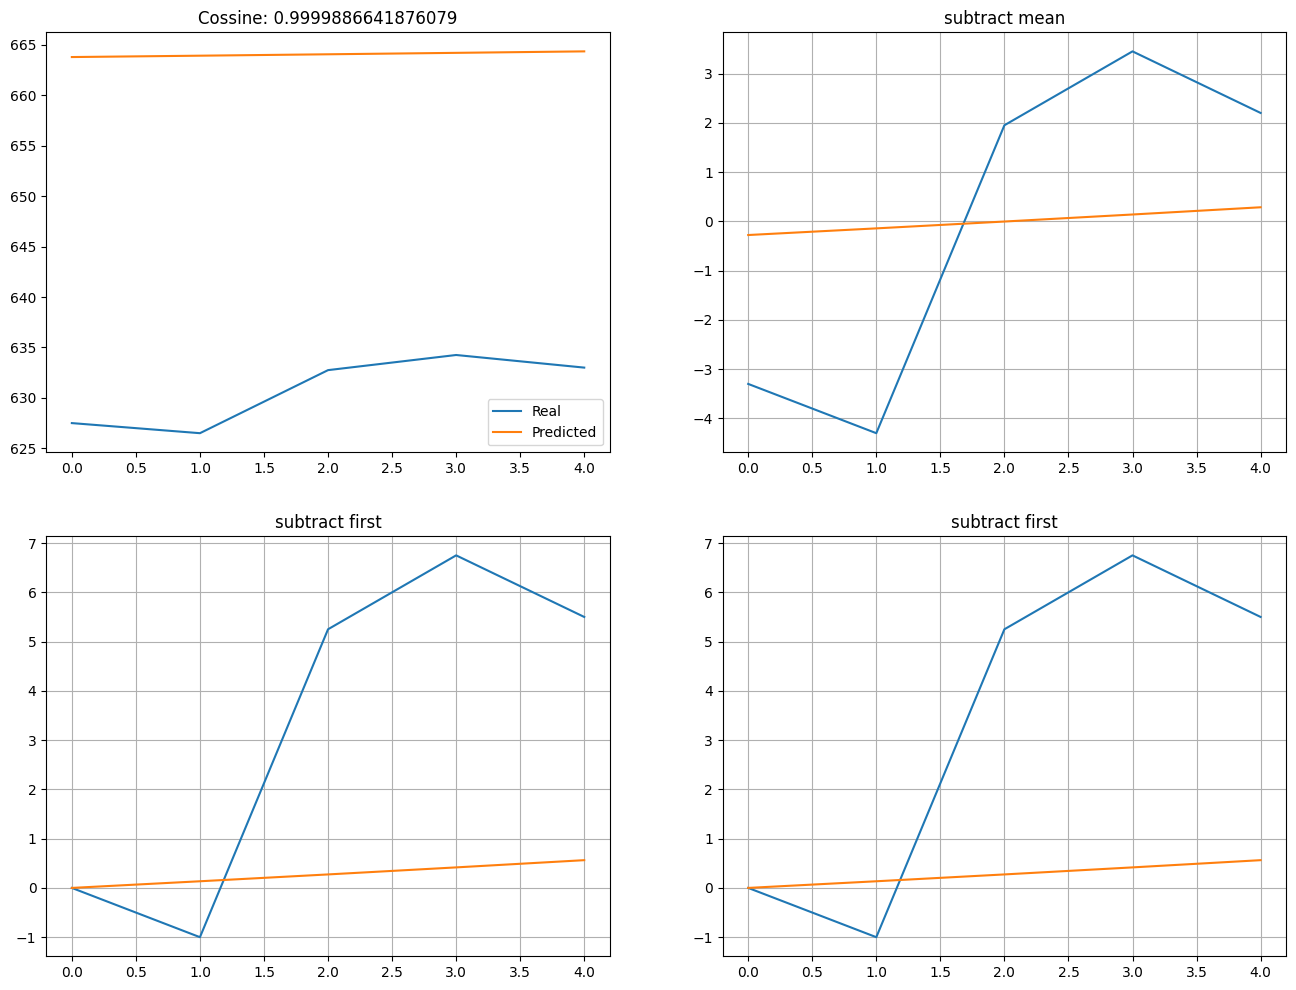

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

axs = axs.flatten()

ax = axs[0]
ax.plot(y_, label="Real")
ax.plot(y_pred, label="Predicted")
ax.set_title(f"Cossine: {cosine_similarity(y_, y_pred)}")
print(f"Cossine Similarity: {cosine_similarity(y_, y_pred)}")
ax.legend()

ax = axs[1]
ax.set_title("subtract mean")
ax.plot(y_ - np.mean(y_))
ax.plot(y_pred - np.mean(y_pred), label="Predicted")
ax.grid()

ax = axs[2]
ax.set_title("subtract first")
ax.plot(y_ - y_[0])
ax.plot(y_pred - y_pred[0], label="Predicted")
ax.grid()

angle_orig, angle_pred, direction = zero_centered_angle_similarity(y_, y_pred, derivative=True)
print(f"Original Angle: {angle_orig.mean()} \t Predicted Angle: {angle_pred.mean()} \t direction: {direction}")

ax = axs[3]
ax.set_title("subtract first")
ax.plot(y_ - y_[0])
ax.plot(y_pred - y_pred[0], label="Predicted")
ax.grid()

angle_orig, angle_pred, direction = zero_centered_angle_similarity(y_, y_pred)
print(f"Original Angle: {angle_orig.mean()} \t Predicted Angle: {angle_pred.mean()} \t direction: {direction}")


angle_orig, angle_pred, direction = zero_centered_angle_similarity(y_, y_pred, derivative=True)
print(f"Angle Similarity: {np.abs(np.mean(angle_orig - angle_pred))} \t direction: {direction}")

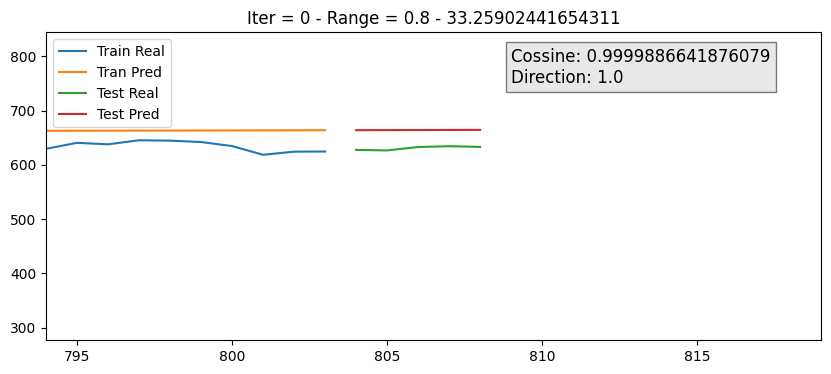

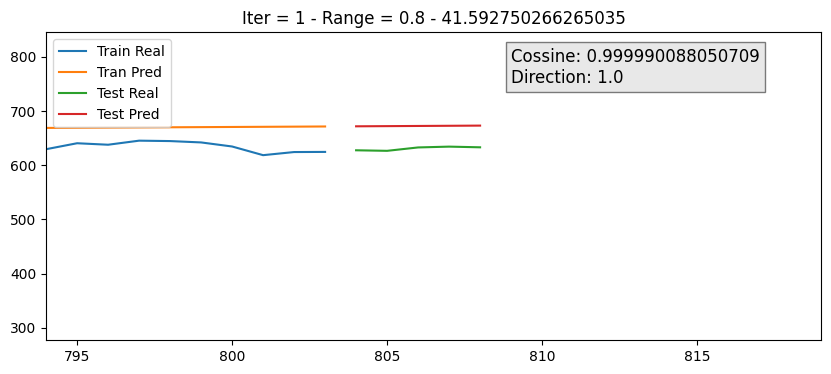

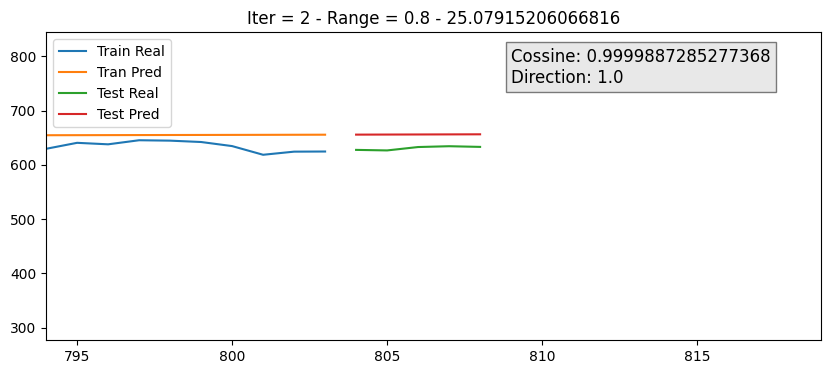

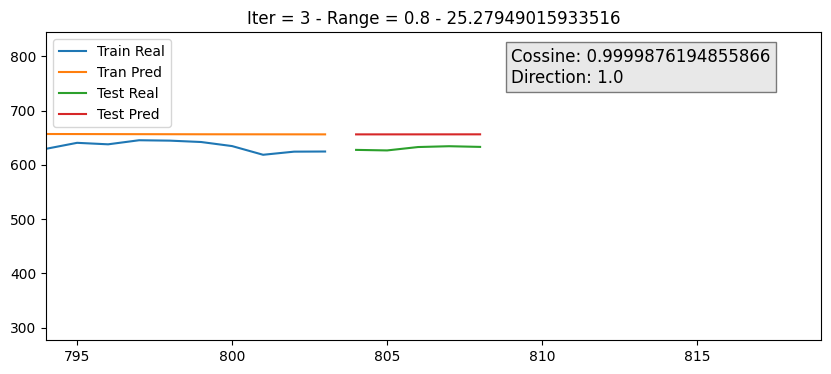

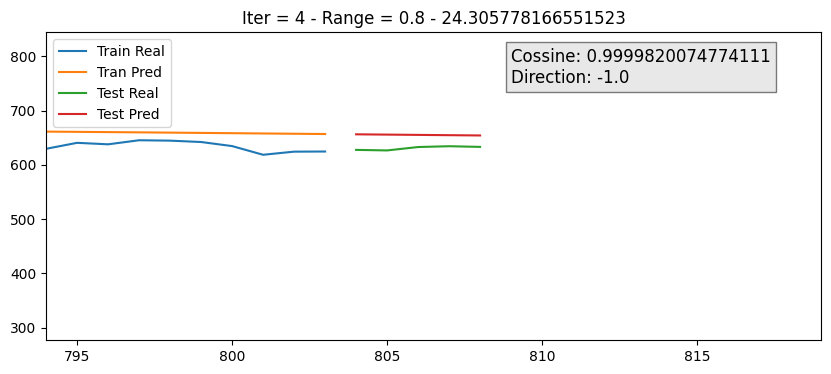

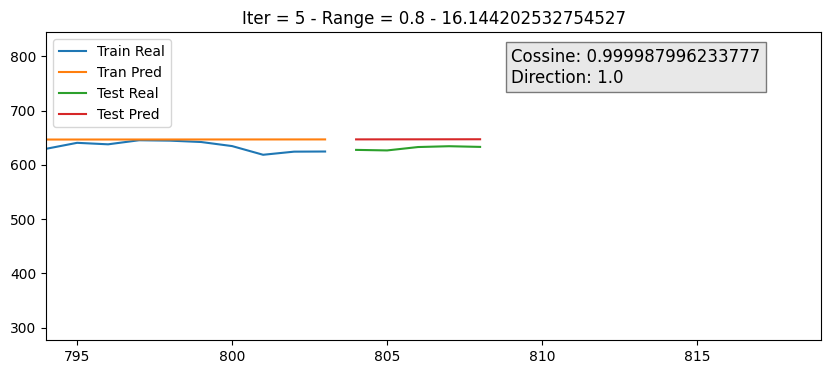

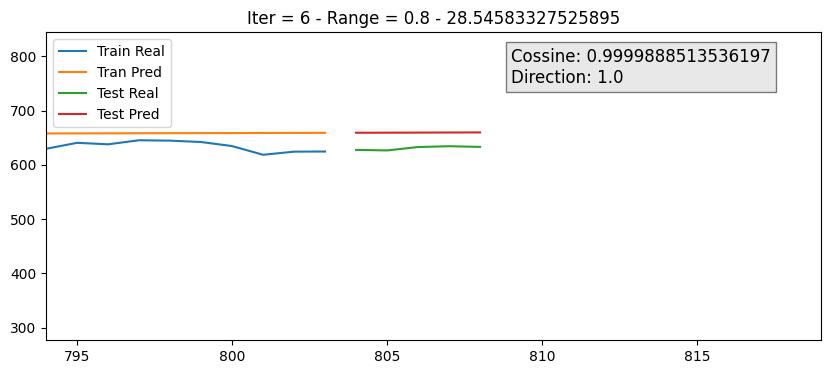

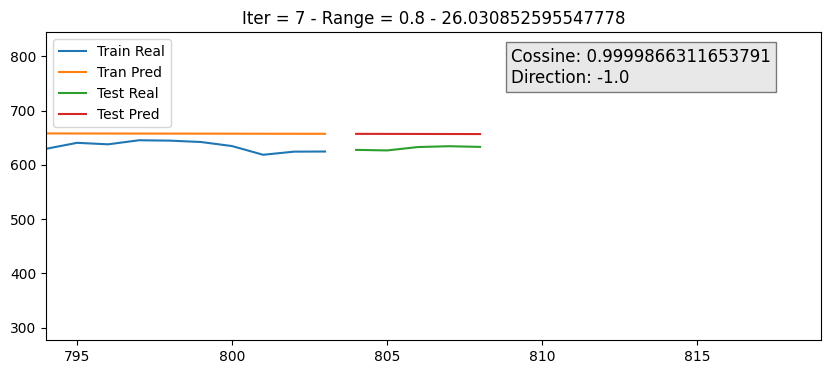

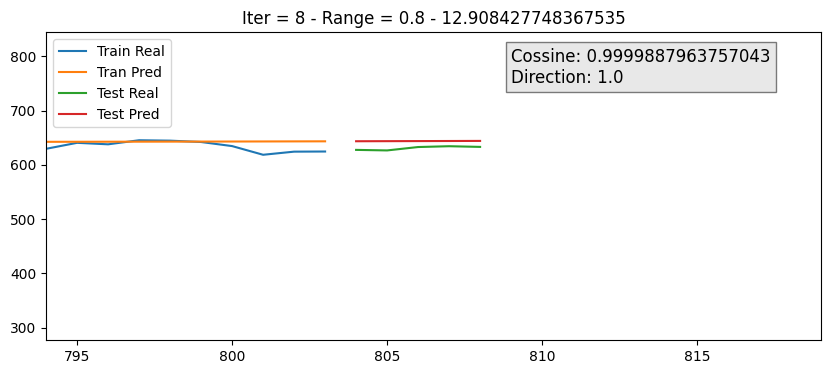

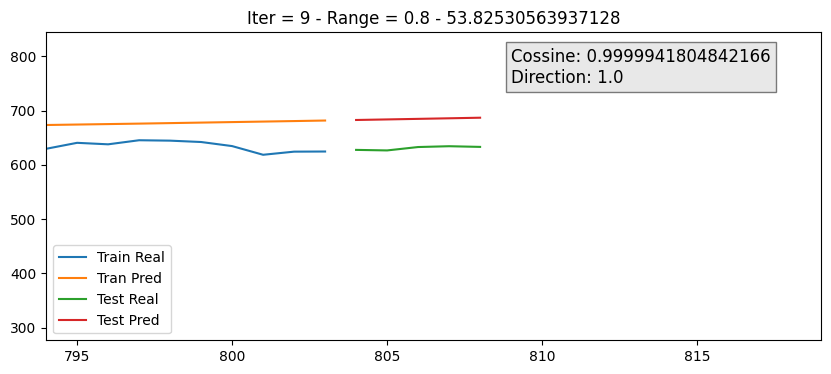

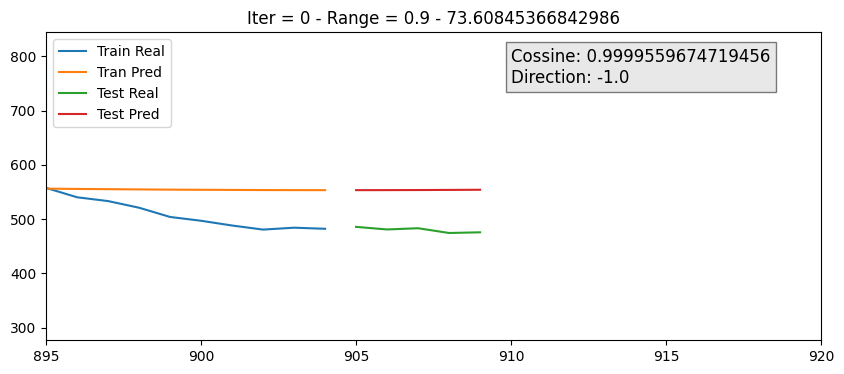

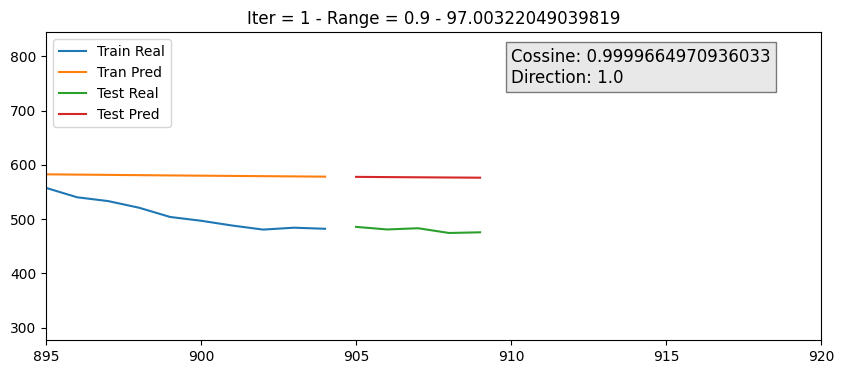

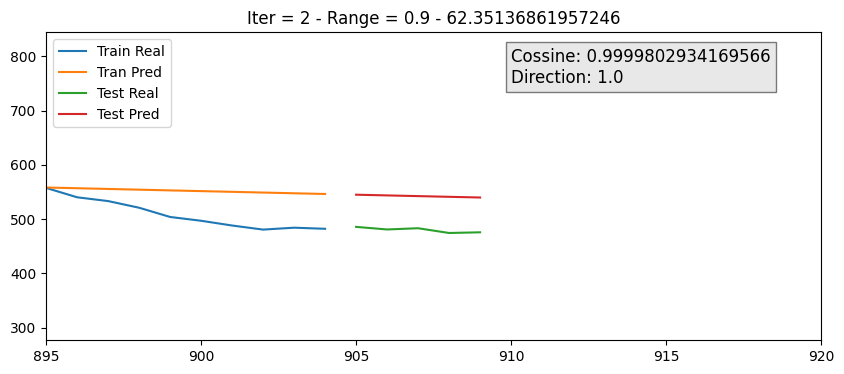

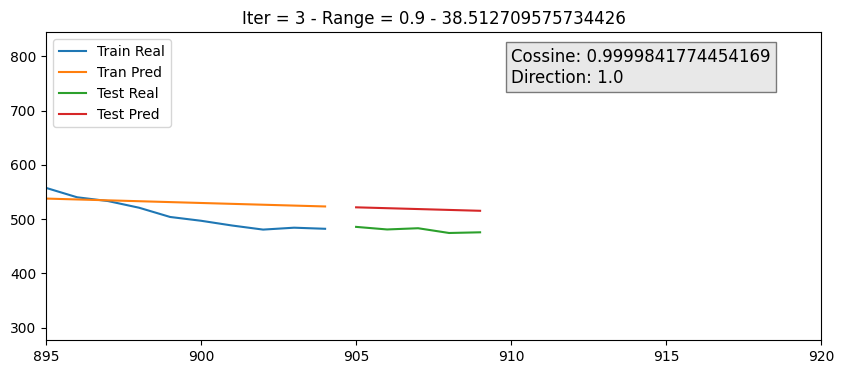

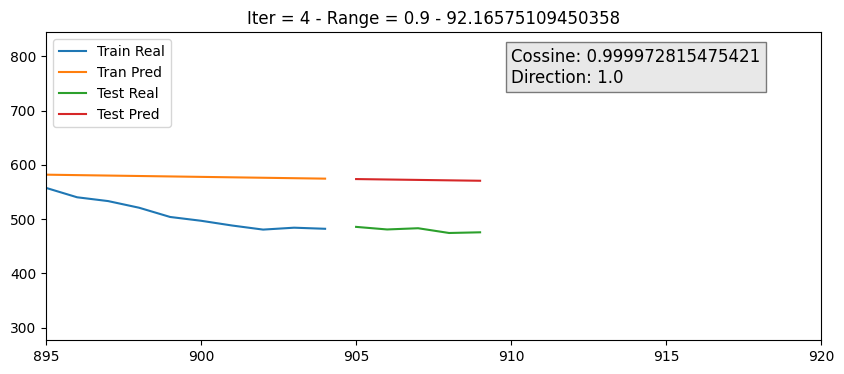

<lambdifygenerated-16>:2: RuntimeWarning: overflow encountered in exp
  return x0 + (1.7265778 - cos(0.00477244513900472*x0 - 0.62192106))*(373.969595397843 - 0.5478201*x0) + 16.6892541814301*cos(0.016839879*x0) + 16.6892541814301*cos(0.0228337843925222*x0) + tan(0.47440871303777*x0 + 930833909.638422) + tan(exp(tan(0.461076935221354*x0 + 930833909.638422))) + 3.77327492756538*tan(cos(0.0111275400496494*x0)) + 2.05197924752312
<lambdifygenerated-16>:2: RuntimeWarning: invalid value encountered in tan
  return x0 + (1.7265778 - cos(0.00477244513900472*x0 - 0.62192106))*(373.969595397843 - 0.5478201*x0) + 16.6892541814301*cos(0.016839879*x0) + 16.6892541814301*cos(0.0228337843925222*x0) + tan(0.47440871303777*x0 + 930833909.638422) + tan(exp(tan(0.461076935221354*x0 + 930833909.638422))) + 3.77327492756538*tan(cos(0.0111275400496494*x0)) + 2.05197924752312


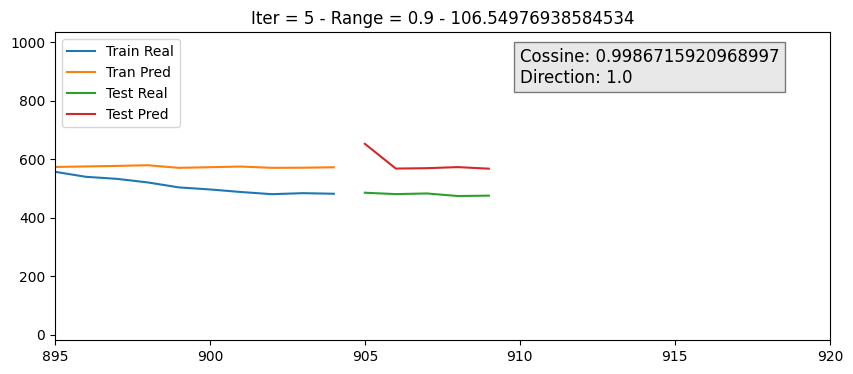

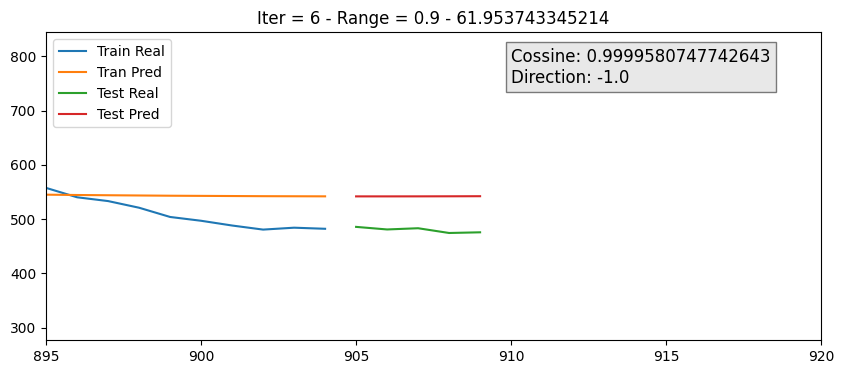

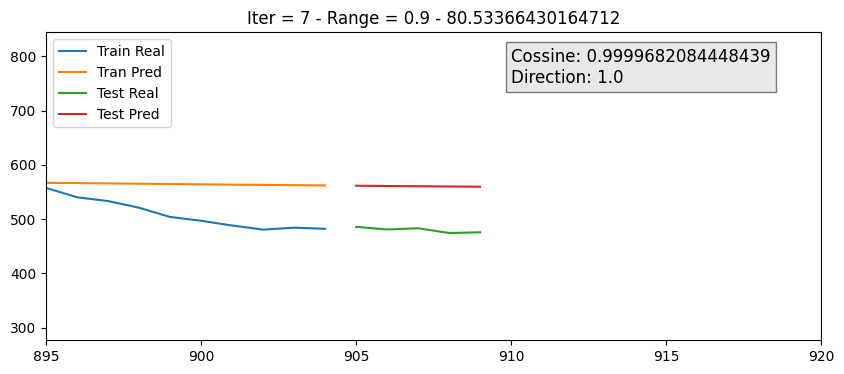

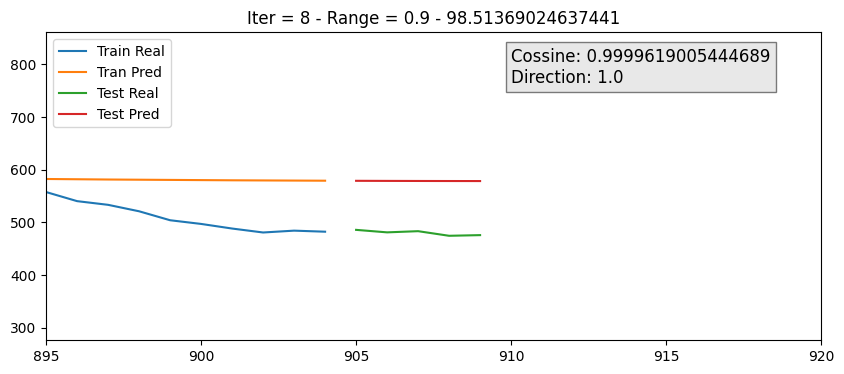

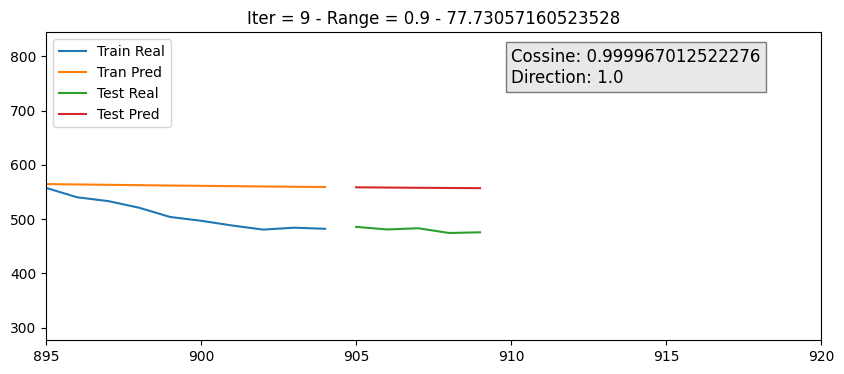

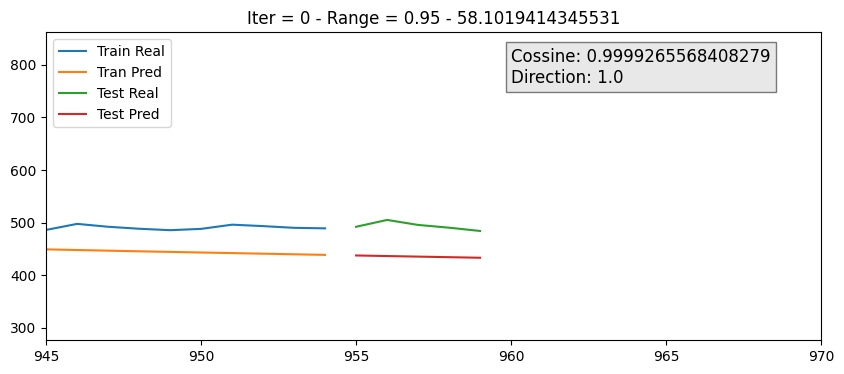

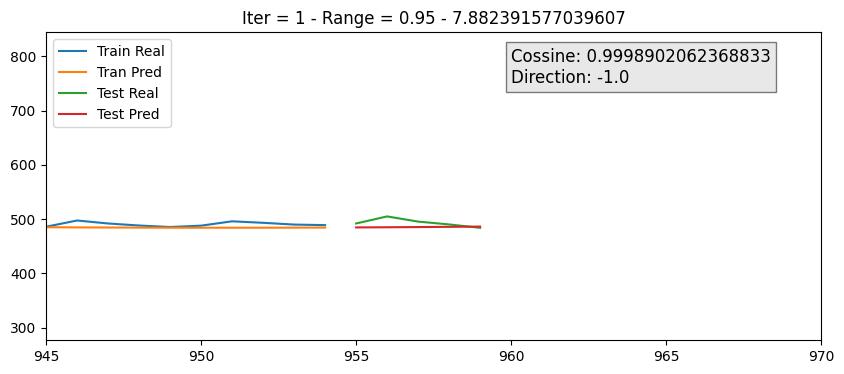

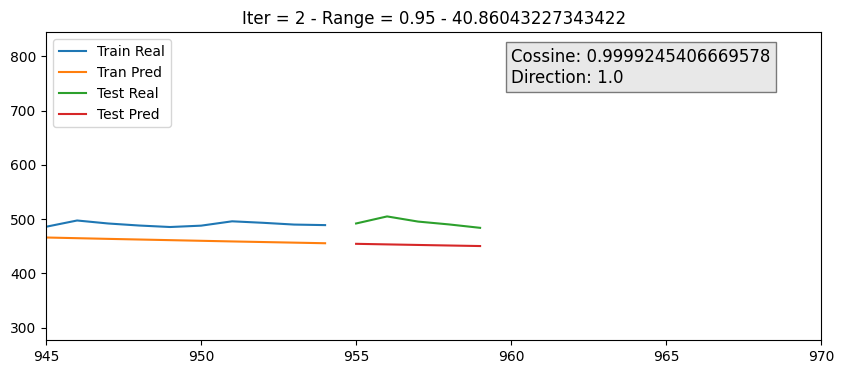

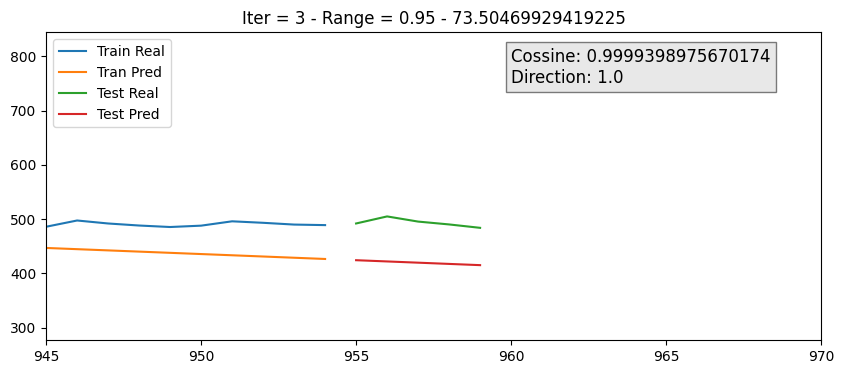

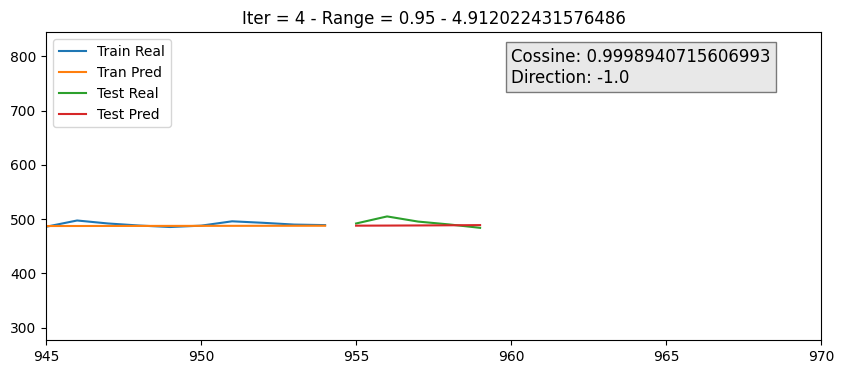

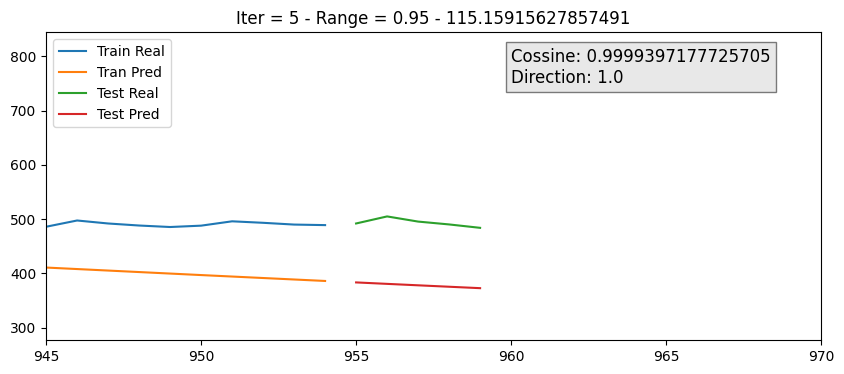

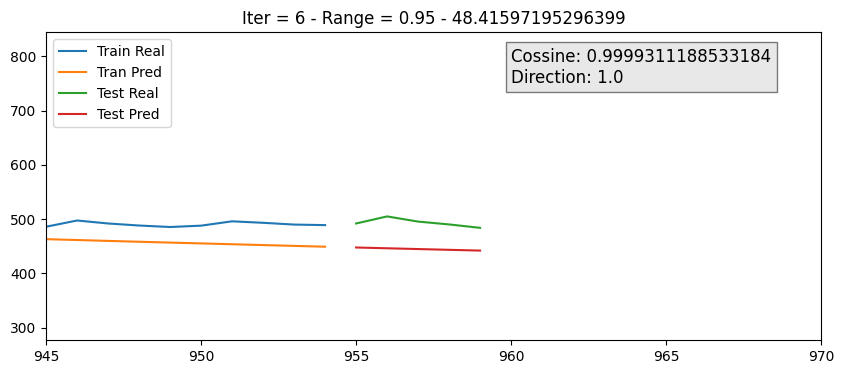

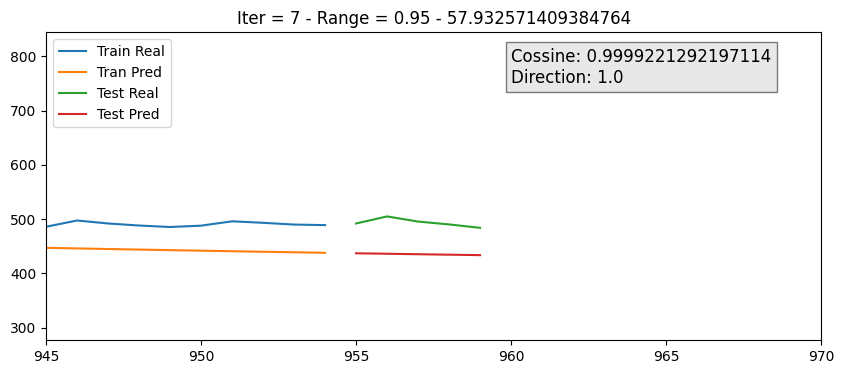

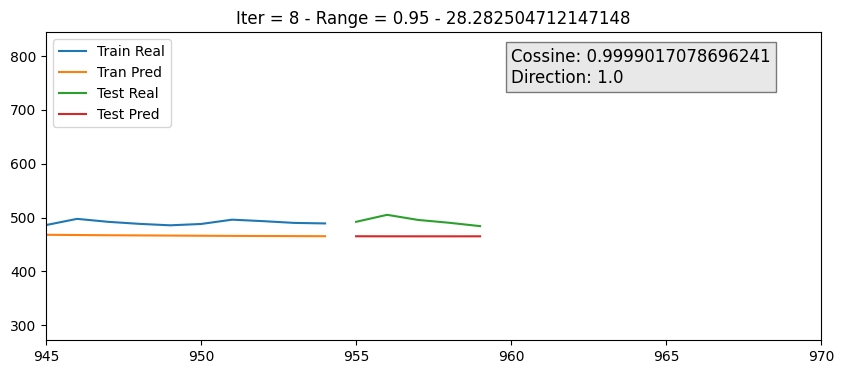

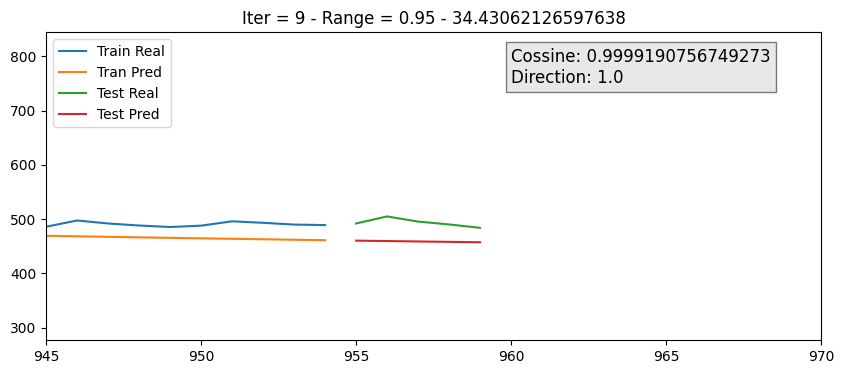

In [ ]:
X = np.c_[corn.index.values]
y = np.c_[corn.Close.values]

range_accuracy = {}

for range_ in solutions_df["Range"].unique():
    X_train, y_train, X_test, y_test = time_train_test_split(X, y, range_)

    range_values = {"positive": 0, "negative": 0}

    solutions_df_ = solutions_df[solutions_df["Range"] == range_]
    for iter_ in solutions_df_["Iter"].unique():
        plt.figure(figsize=(10, 4))
        solutions_df__ = solutions_df_[solutions_df_["Iter"] == iter_]
        sum_expr = solutions_df__.SumExpr.values[0]
        plt.plot(X_train, y_train, label="Train Real")
        plt.plot(X_train, sum_expr(X_train), label="Tran Pred")
        # result.trend.plot()
        plt.plot(X_test[:5], y_test[:5], label="Test Real")
        plt.plot(X_test[:5], sum_expr(X_test[:5]), label="Test Pred")
        # plt.plot(X_test, y_test)
        # plt.plot(X_test, sum_expr(X_test))
        plt.title(f"Iter = {iter_} - Range = {range_} - {np.sqrt(np.mean(y_test[:5] - sum_expr(X_test[:5]))**2)}")
        plt.xlim(X_test[0]-10, X_test[5]+10)
        plt.legend()

        ax = plt.gca()
        angle_orig, angle_pred, direction = zero_centered_angle_similarity(y_test[:5], sum_expr(X_test[:5]), derivative=True)
        textstr = f"Cossine: {cosine_similarity(y_test[:5], sum_expr(X_test[:5]))}\nDirection: {direction}"
        ax.text(0.60, 0.95, textstr, transform=ax.transAxes, fontsize=12,
                verticalalignment='top', bbox=dict(facecolor='lightgray', alpha=0.5, edgecolor='black'))

        plt.show()

        if direction > 0:
            range_values["positive"] += 1
        else:
            range_values["negative"] += 1
 
    range_accuracy[range_] = range_values
        
    
    

In [86]:
range_accuracy

{np.float64(0.8): {'positive': 8, 'negative': 2},
 np.float64(0.9): {'positive': 8, 'negative': 2},
 np.float64(0.95): {'positive': 8, 'negative': 2}}

In [91]:
for key, value in range_accuracy.items():
    print(f"range {key}: Prob pos = {value["positive"]/(value["positive"] + value["negative"]):.2%}")

range 0.8: Prob pos = 80.00%
range 0.9: Prob pos = 80.00%
range 0.95: Prob pos = 80.00%


In [100]:
range_df = pd.DataFrame(range_accuracy).T.reset_index()
range_df.columns = ["Range", "Positive", "Negative"]
range_df

,Range,Positive,Negative
0,0.80,8,2
1,0.90,8,2
2,0.95,8,2


In [109]:
range_long = range_df.melt(id_vars=["Range"], value_vars=["Positive", "Negative"], 
                            var_name="Category", value_name="Value")
range_long

,Range,Category,Value
0,0.80,Positive,8
1,0.90,Positive,8
2,0.95,Positive,8
3,0.80,Negative,2
4,0.90,Negative,2
5,0.95,Negative,2


<Axes: xlabel='Range', ylabel='Value'>

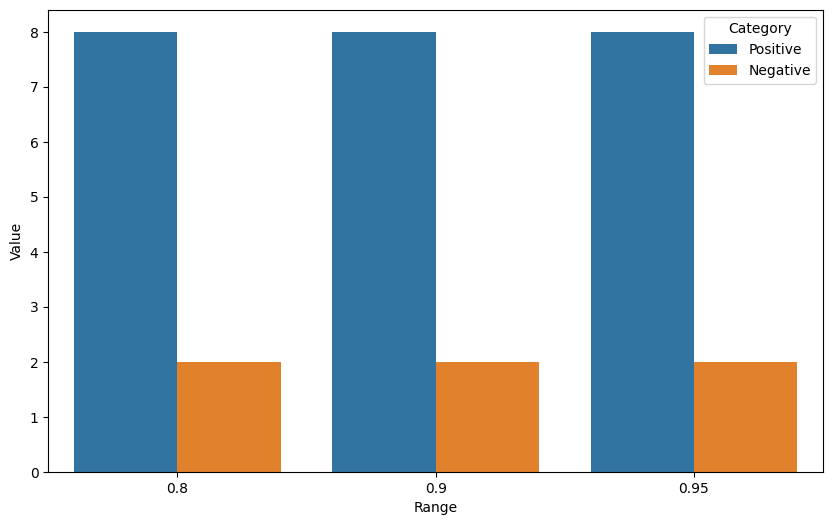

In [110]:
sns.barplot(range_long, hue="Category", x="Range", y="Value")

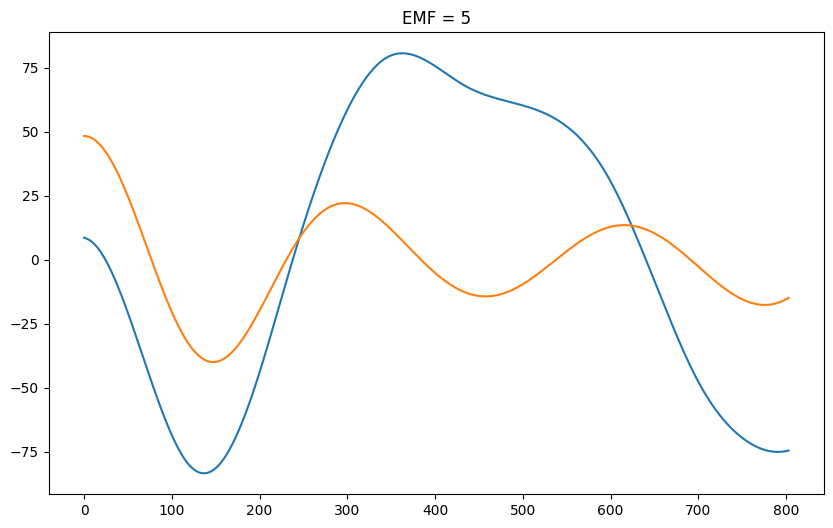

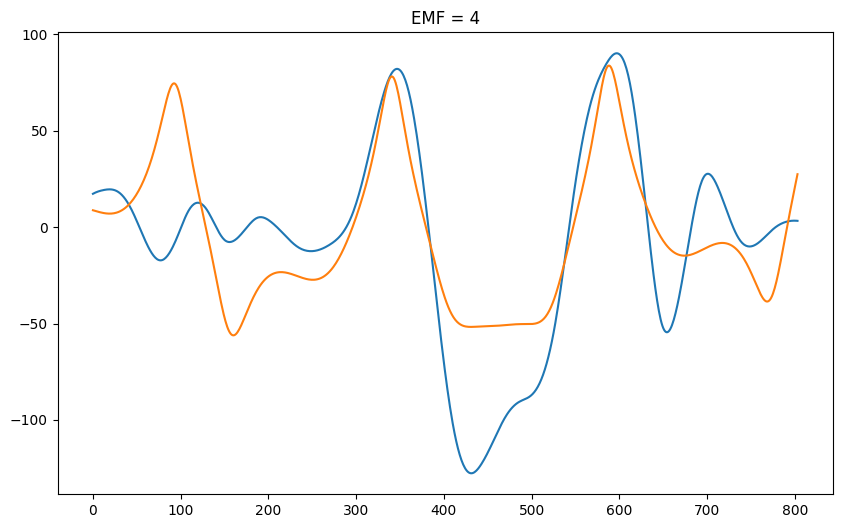

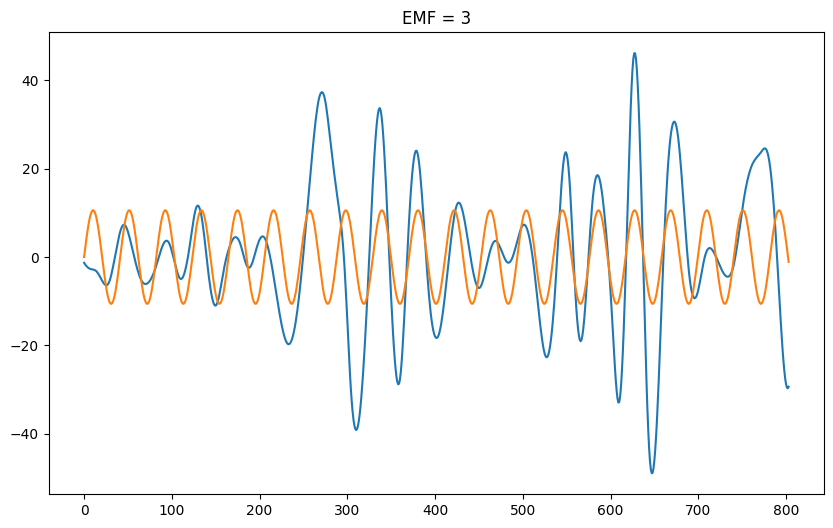

In [ ]:
x = smp.symbols("x0")


plt.figure(figsize=(10, 6))

for index, value in best_sols.items():
    func = smp.lambdify([x], value["Expr"])
    plt.plot(X_train, SRReconstruct.decomposition[index])
    plt.plot(X_train, func(X_train))
    plt.title(f"EMF = {index}")
    plt.show()

# for c, sol in enumerate(solutions):
#     func = smp.lambdify([x], sol)
#     plt.plot(X_train, imfs[c])
#     plt.plot(X_train, func(X_train))
#     plt.show()

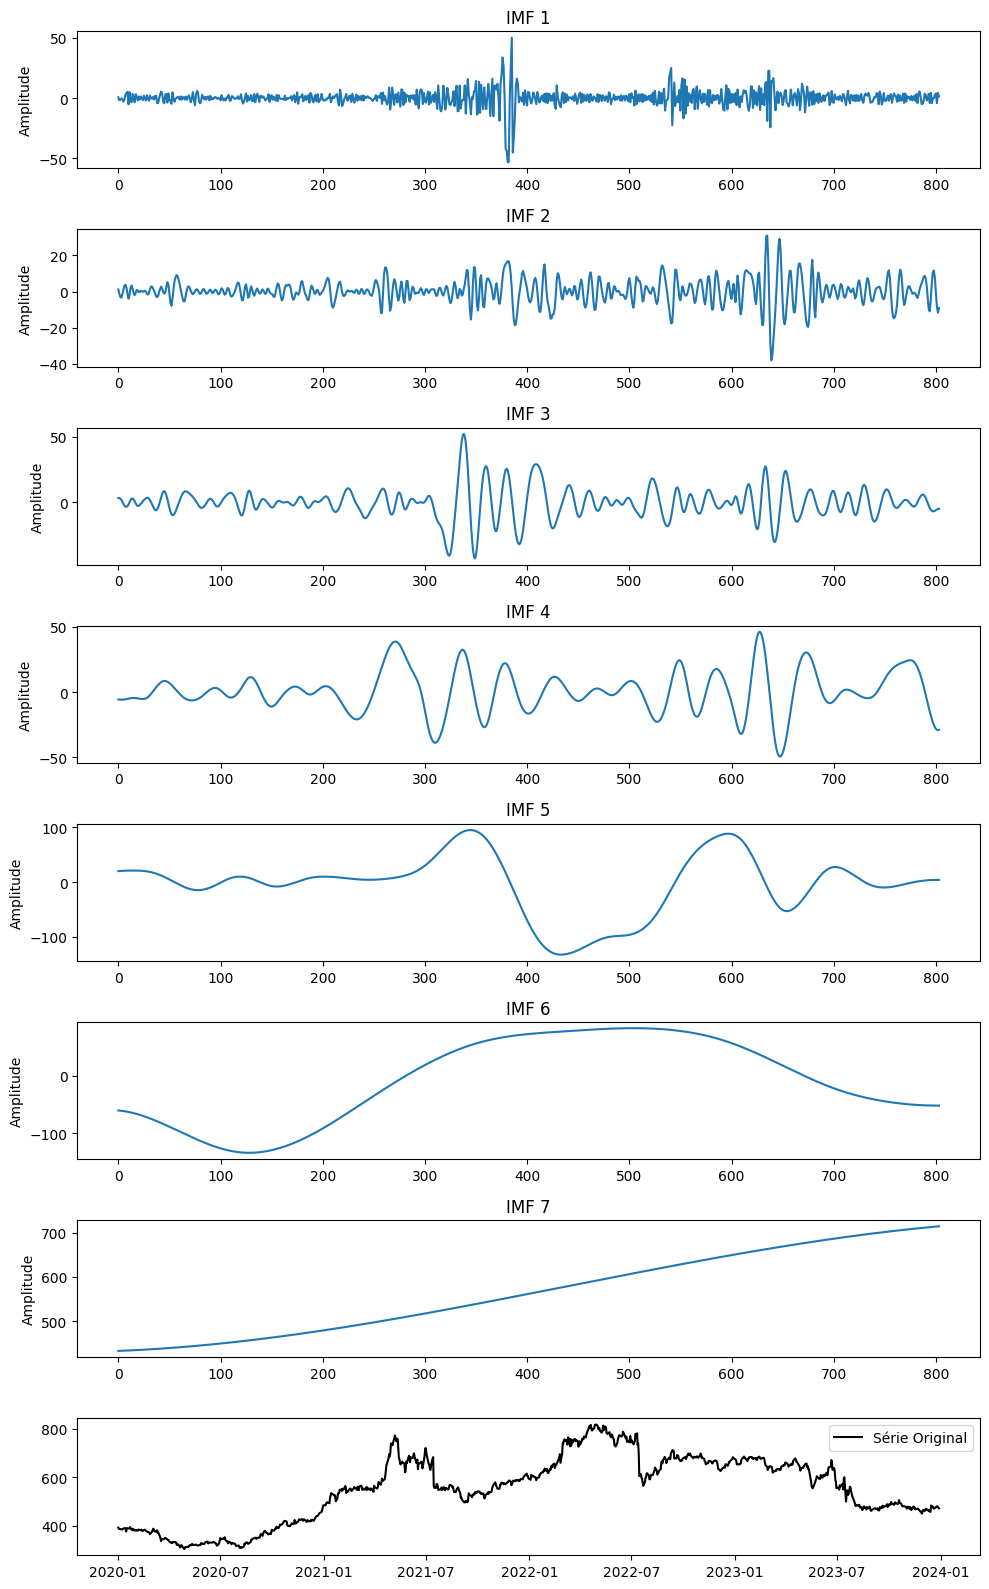

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PyEMD import CEEMDAN

# Criando uma série temporal de exemplo
t = np.linspace(0, 10, 1000)
serie = np.sin(2 * np.pi * t) + 0.5 * np.sin(4 * np.pi * t) + 0.2 * np.sin(8 * np.pi * t) + 0.1 * np.random.randn(1000)
# print(serie)

t = corn.Date.values
serie = corn.Close.values
# print(serie)

# Aplicando CEEMDAN
ceemdan = CEEMDAN()  # Criando o objeto CEEMDAN
imfs = ceemdan(y_train.reshape(-1, ))  # Decompondo a série

# Plotando os IMFs
num_imfs = imfs.shape[0]
plt.figure(figsize=(10, 16))
for i in range(num_imfs):
    plt.subplot(num_imfs + 1, 1, i + 1)
    plt.plot(X_train.reshape(-1,), imfs[i])
    plt.title(f'IMF {i+1}')
    plt.ylabel("Amplitude")

# Última subplot: série original
plt.subplot(num_imfs + 1, 1, num_imfs + 1)
plt.plot(t, serie, label="Série Original", color='black')
plt.legend()

plt.tight_layout()
plt.show()


In [8]:
pysr = PySRRegressor(
    binary_operators=["+", "-", "*", "/"], 
    unary_operators=["exp", "cos", "sin", "tan"],
    temp_equation_file=True,
    elementwise_loss="loss(prediction, target) = (prediction - target)^2",
    niterations=60,
    populations=20,
    population_size=60,
    maxsize=40,
    warm_start=False,
    verbosity=False,
    progress=False
)

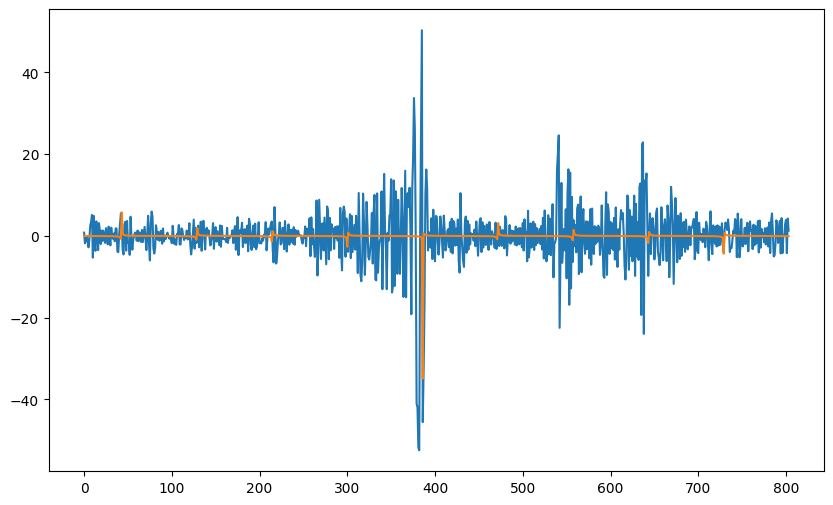

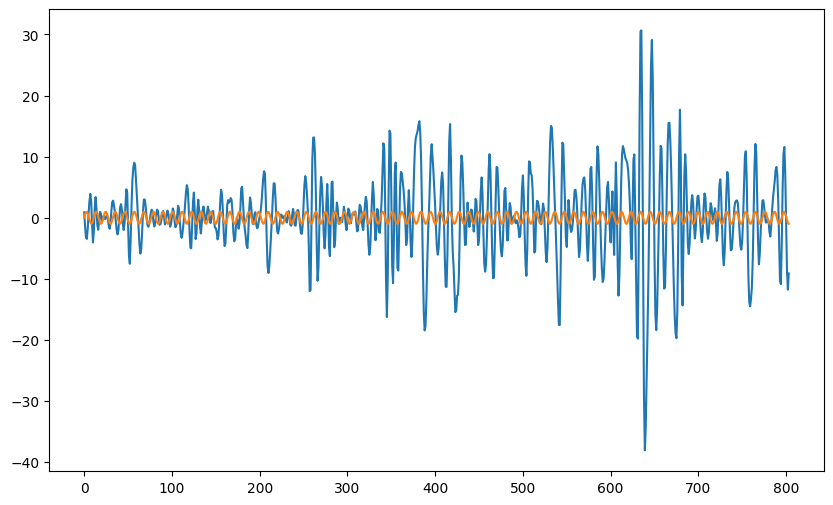

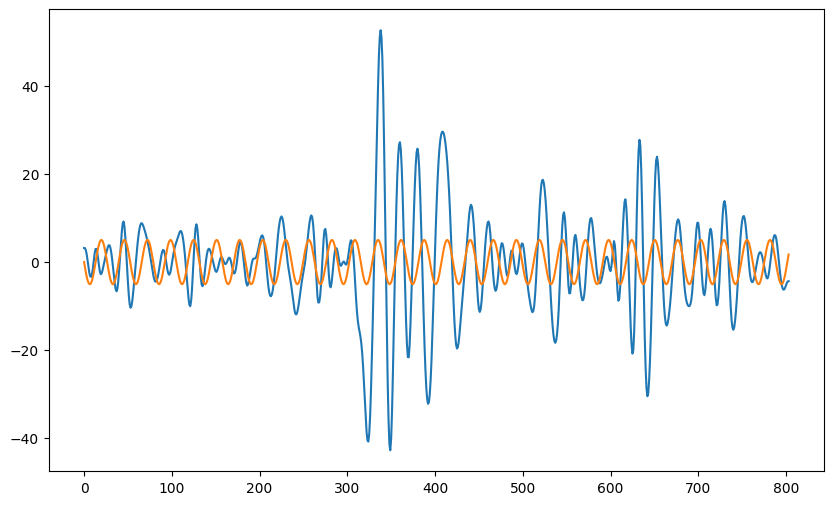

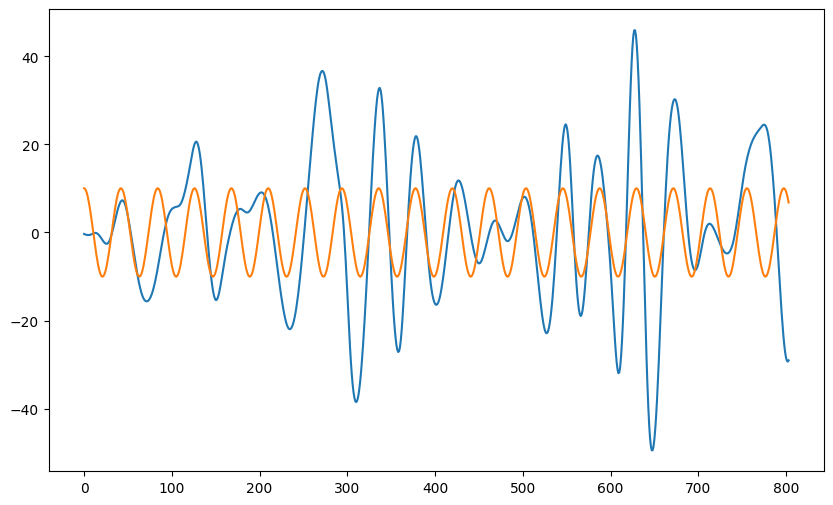

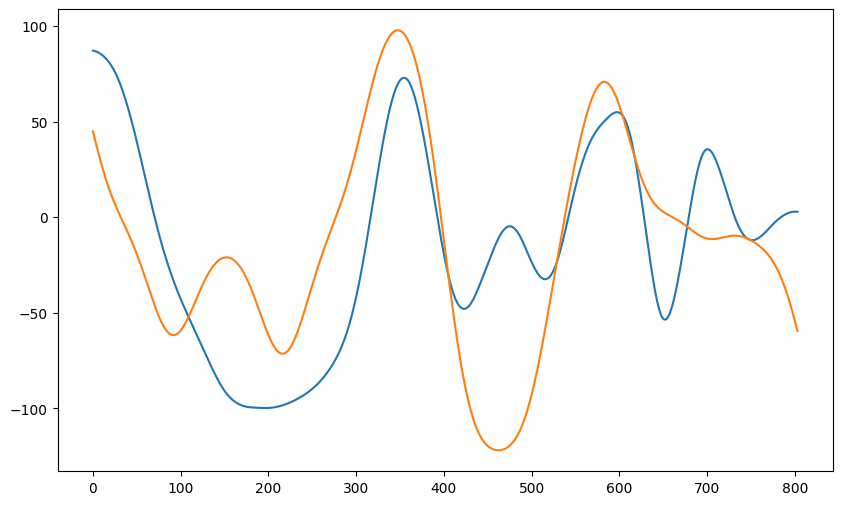

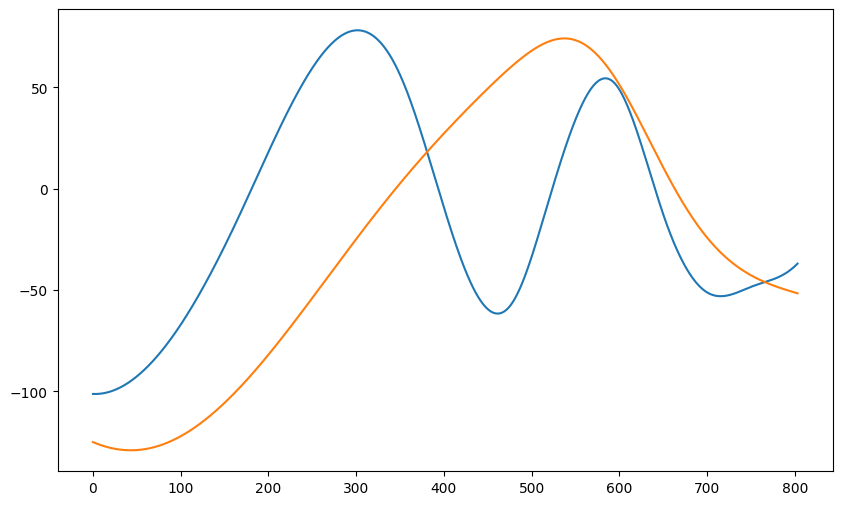

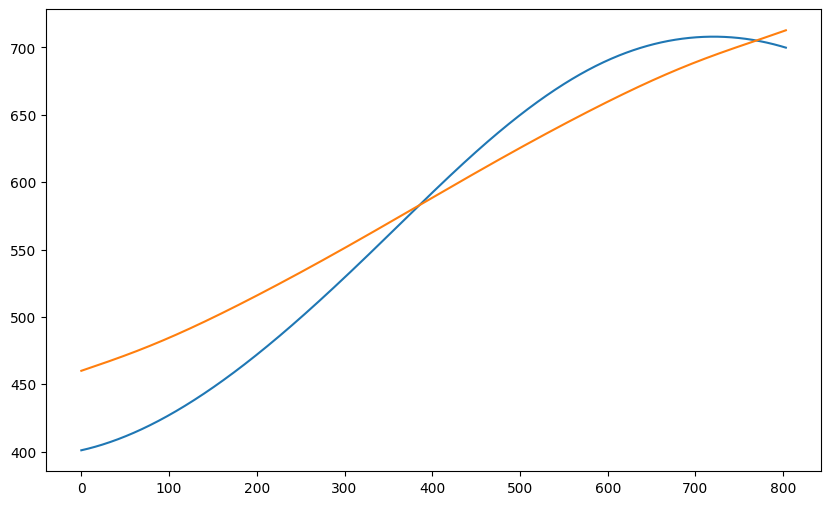

In [11]:
x = smp.symbols("x0")

with open(f"save_results/decomposition_test_train-{4}.pkl", "rb") as file:
        solutions = pickle.load(file)
solutions

plt.figure(figsize=(10, 6))

for c, sol in enumerate(solutions):
    func = smp.lambdify([x], sol)
    plt.plot(X_train, imfs[c])
    plt.plot(X_train, func(X_train))
    plt.show()

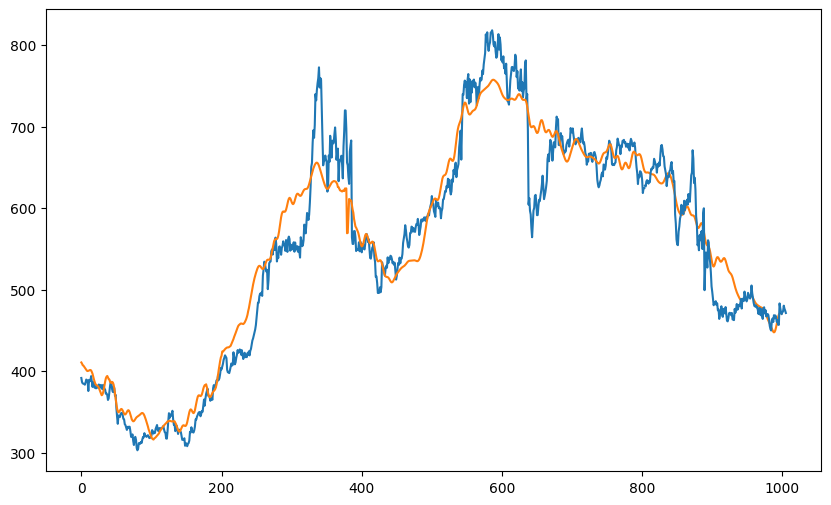

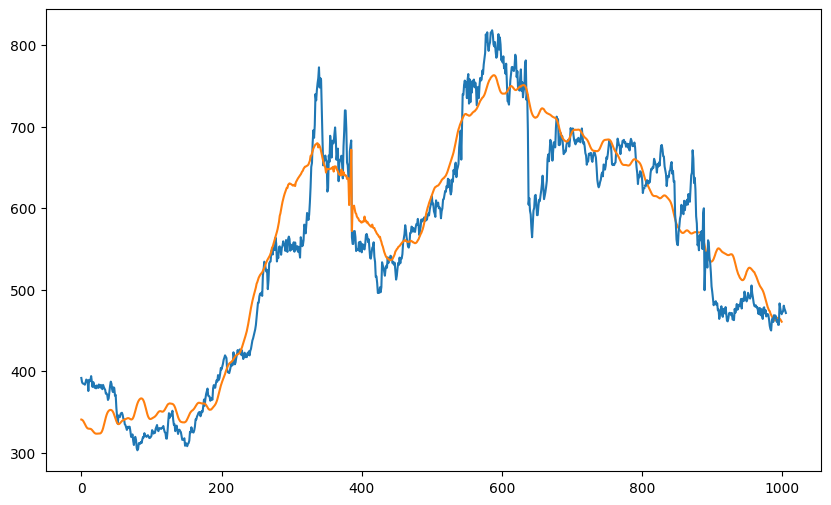

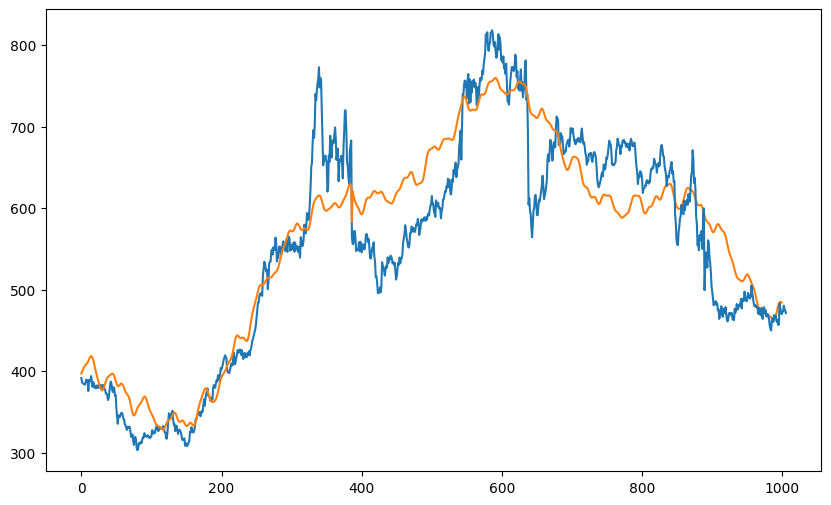

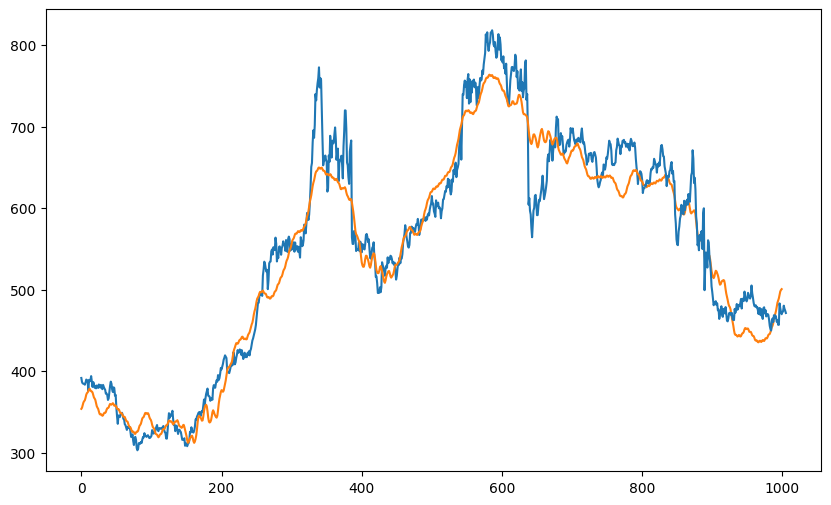

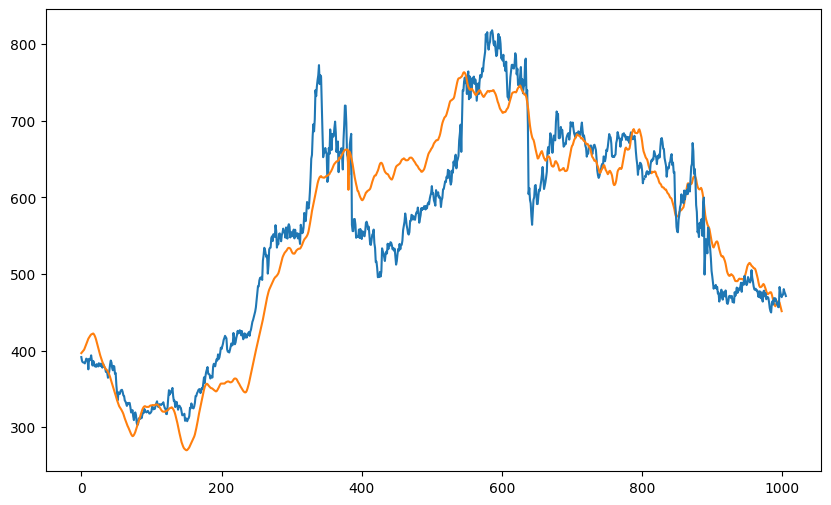

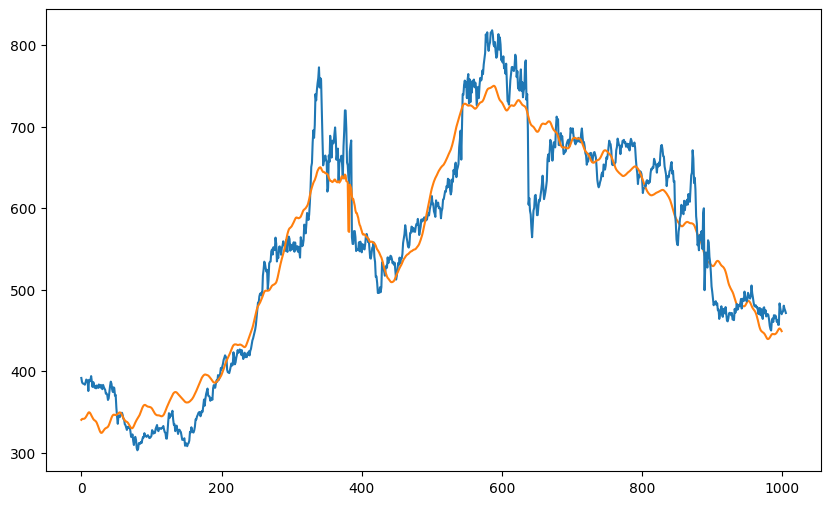

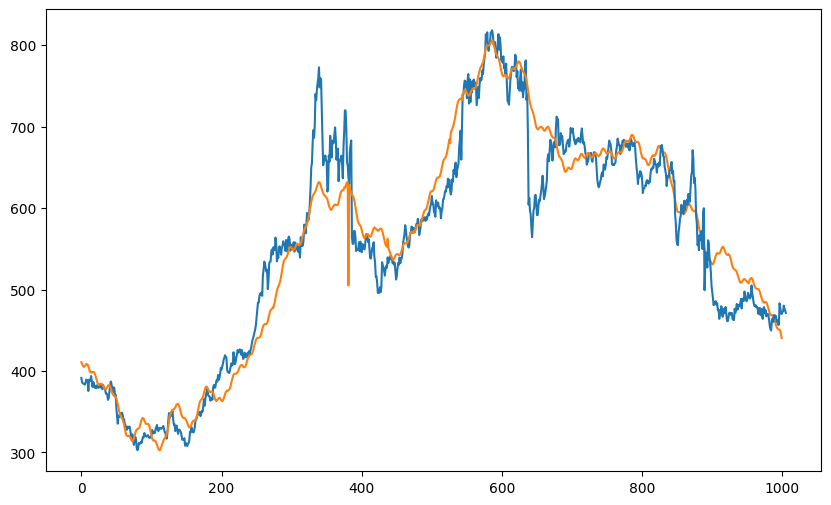

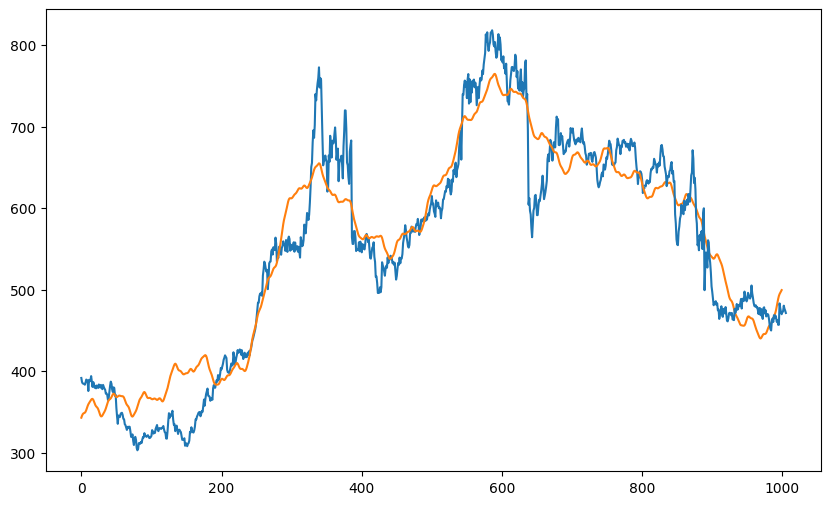

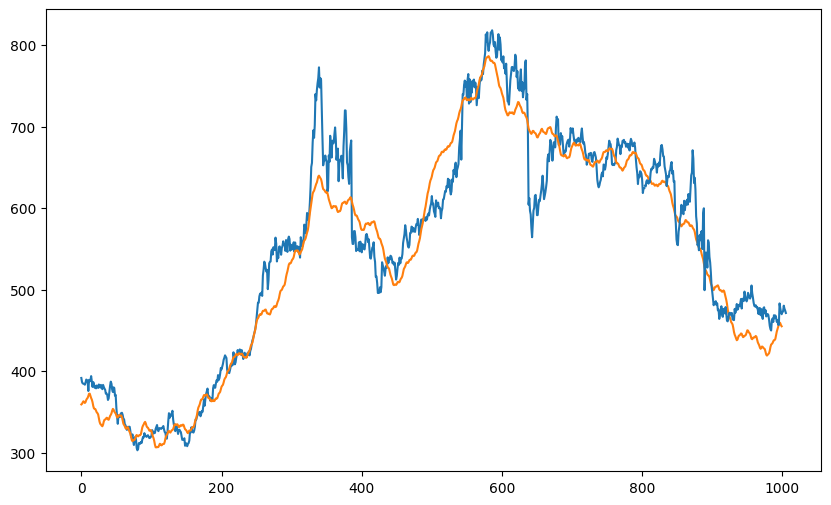

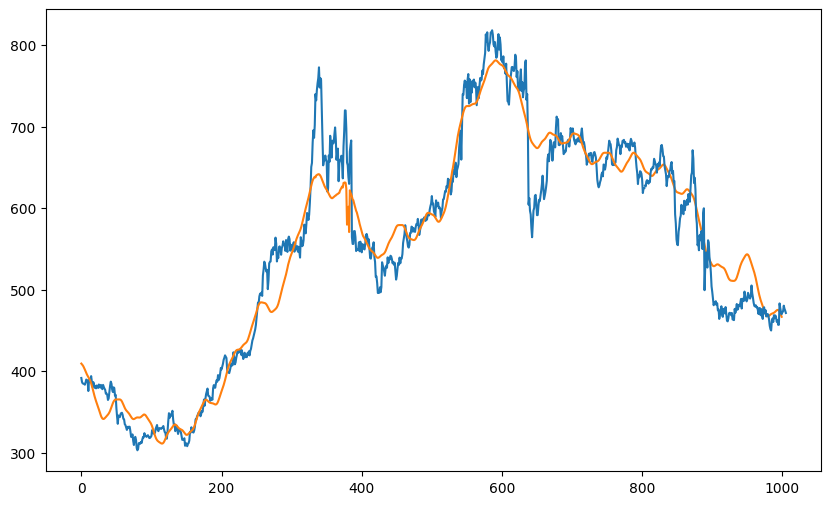

In [18]:
import pickle

x = smp.symbols("x0")

for i in range(10):
    with open(f"save_results/decomposition_test-{i}.pkl", "rb") as file:
        solutions = pickle.load(file)
    
    imfs_sum = np.sum(imfs, axis=0)
    sum_func = smp.lambdify([x], np.sum(solutions))
    plt.plot(X_train, imfs_sum, label="Train")
    # plt.plot(X, corn.Close)
    X_extend = np.arange(0, 1000)
    plt.plot(X_extend, sum_func(X_extend), label="Predicted")
    plt.plot(X_test, y_test, c="tab:blue")
    # plt.plot(X_train.reshape(-1, ), sum_func(X_train.reshape(-1, )))
    plt.show()

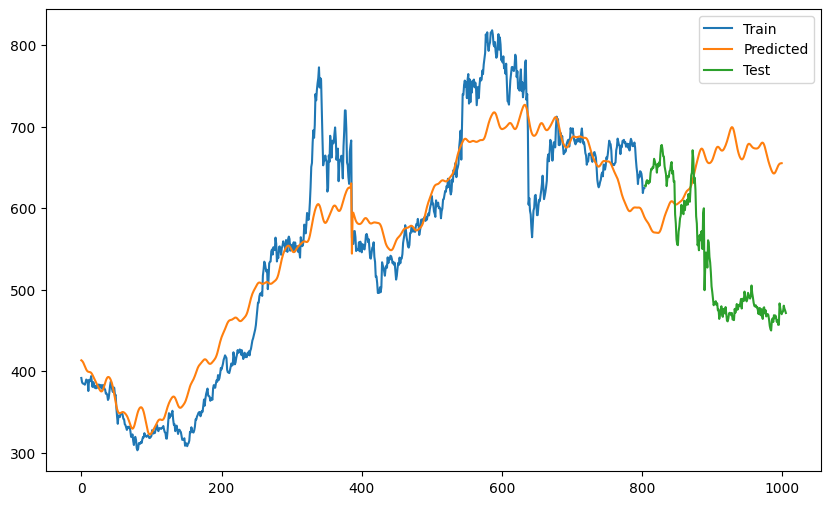

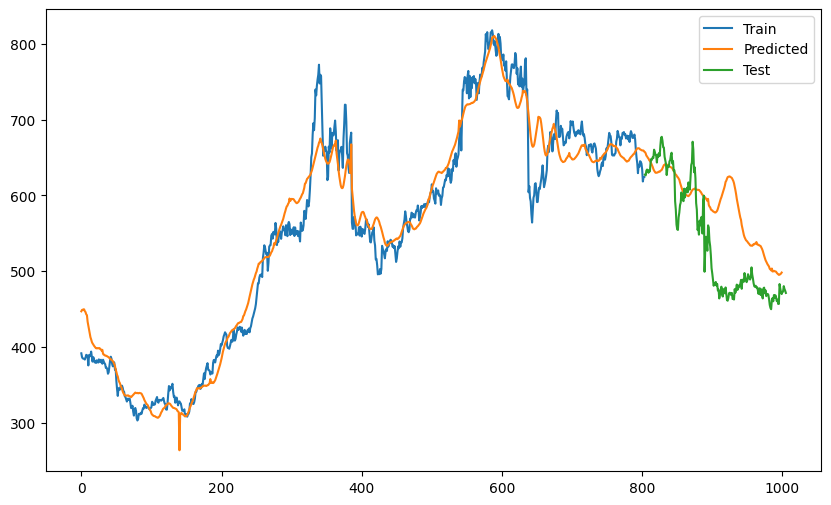

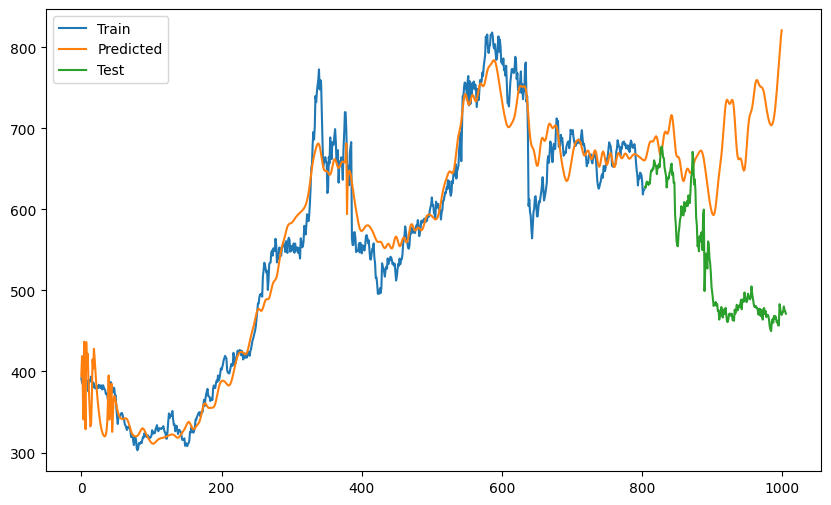

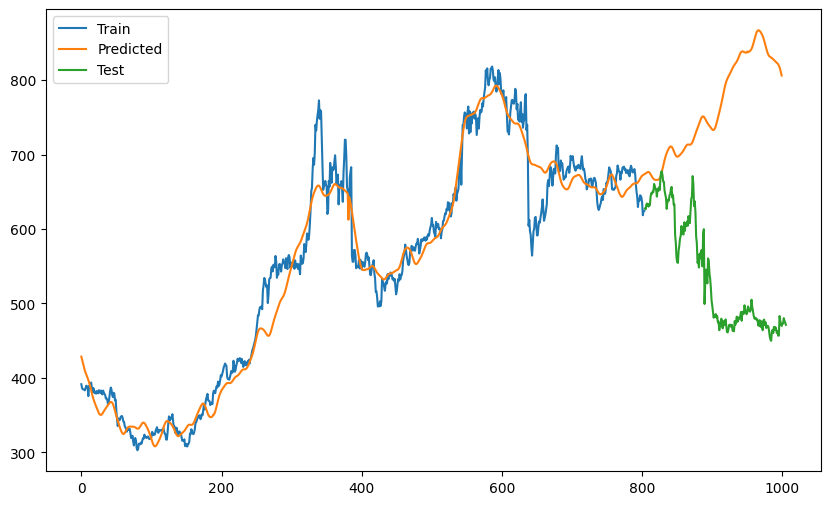

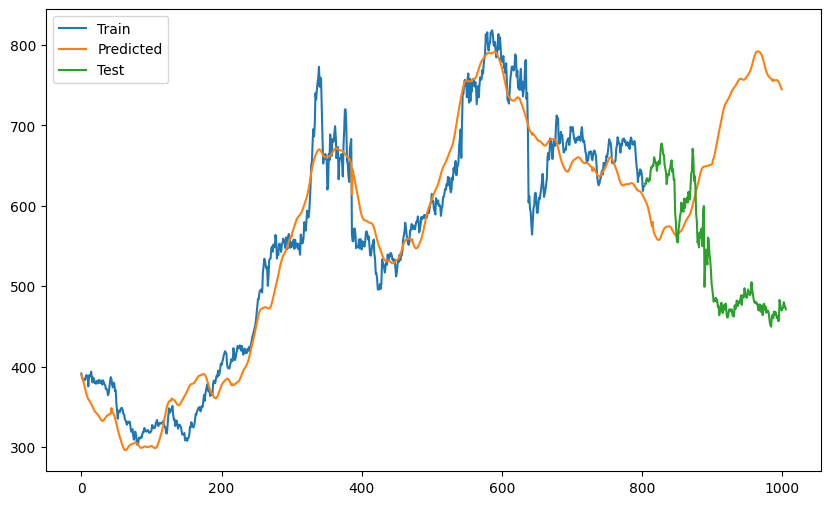

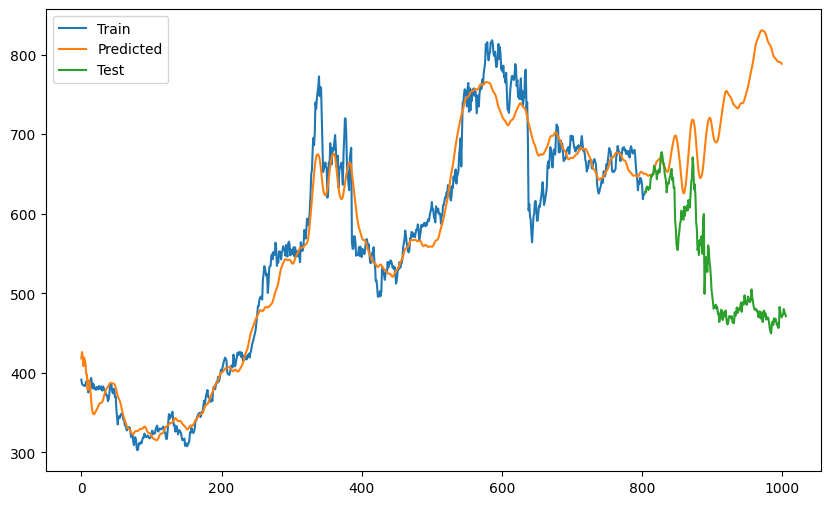

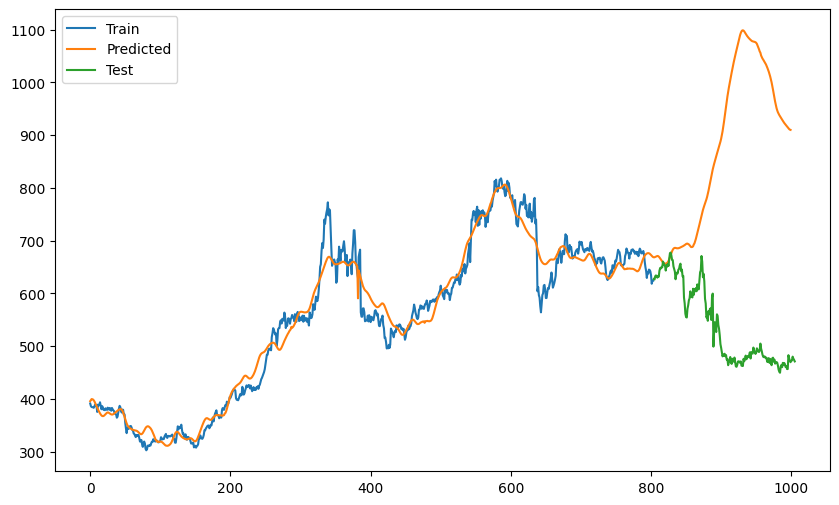

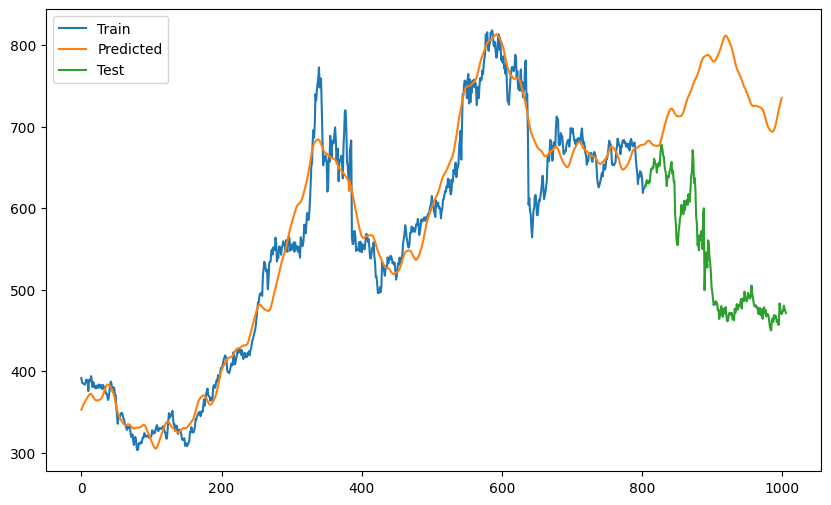

In [20]:
x = smp.symbols("x0")

for i in range(8):
    with open(f"save_results/decomposition_test_train-{i}.pkl", "rb") as file:
        solutions = pickle.load(file)
    
    imfs_sum = np.sum(imfs, axis=0)
    sum_func = smp.lambdify([x], np.sum(solutions))
    plt.plot(X_train, imfs_sum, label="Train")
    # plt.plot(X, corn.Close)
    X_extend = np.arange(0, 1000)
    plt.plot(X_extend, sum_func(X_extend), label="Predicted")
    plt.plot(X_test, y_test, label="Test")
    # plt.plot(X_train.reshape(-1, ), sum_func(X_train.reshape(-1, )))
    plt.legend()
    plt.show()